In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import collections
import matplotlib
%matplotlib inline

## Explore Data

In [2]:
df_unweighted = pd.read_csv('combined_final_unweighted.csv')
df_unweighted

node_start                node_end        status
0          Hong Kong                   Samoa  jurisdiction
1          Hong Kong                   Samoa  jurisdiction
2          Hong Kong                   Samoa  jurisdiction
3          Hong Kong                   Samoa  jurisdiction
4          Hong Kong                   Samoa  jurisdiction
...              ...                     ...           ...
338127     Indonesia  British Virgin Islands  officer_base
338128  Cook Islands  British Virgin Islands  officer_base
338129     Hong Kong  British Virgin Islands  officer_base
338130  Cook Islands          United Kingdom  officer_base
338131     Hong Kong          United Kingdom  officer_base

[338132 rows x 3 columns]

In [3]:
df_weighted = pd.read_csv('combined_final_weighted.csv')
df_weighted

node_start                node_end        status  weight
0          Hong Kong                   Samoa  jurisdiction     2.0
1          Hong Kong                   Samoa  jurisdiction     2.0
2          Hong Kong                   Samoa  jurisdiction     2.0
3          Hong Kong                   Samoa  jurisdiction     2.0
4          Hong Kong                   Samoa  jurisdiction     2.0
...              ...                     ...           ...     ...
338119     Indonesia  British Virgin Islands  officer_base     1.0
338120  Cook Islands  British Virgin Islands  officer_base     1.0
338121     Hong Kong  British Virgin Islands  officer_base     1.0
338122  Cook Islands          United Kingdom  officer_base     1.0
338123     Hong Kong          United Kingdom  officer_base     1.0

[338124 rows x 4 columns]

In [4]:
df_weighted['status'].unique()

array(['jurisdiction', 'intermediary_base', 'intermediary_jurisdiction',
       'officer_base', 'officer_jurisdiction'], dtype=object)

In [7]:
df_weighted_jur = df_weighted[df_weighted['status'] == 'jurisdiction']
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

node_start      node_end
0                    Hong Kong         Samoa
1                    Hong Kong         Samoa
2                    Hong Kong         Samoa
3                    Hong Kong         Samoa
4                    Hong Kong         Samoa
...                        ...           ...
216554  British Virgin Islands  Cook Islands
216555  British Virgin Islands  Cook Islands
216556  British Virgin Islands  Cook Islands
216557  British Virgin Islands  Cook Islands
216558                 Vanuatu  Cook Islands

[216559 rows x 2 columns]

In [13]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

node_start                node_end  size
0       Albania                 Bahamas     2
1       Andorra                 Bahamas    26
2       Andorra  British Virgin Islands    39
3       Andorra          Cayman Islands     1
4       Andorra              Costa Rica     3
...         ...                     ...   ...
1212    Vietnam                  Panama     1
1213      Yemen                  Panama     1
1214     Zambia  British Virgin Islands     2
1215   Zimbabwe  British Virgin Islands     5
1216   Zimbabwe                  Panama     3

[1217 rows x 3 columns]

### Convert Data to an Undirected Edge List

In [15]:
df_jur_grouped_list = df_jur_grouped.values.tolist()
df_jur_grouped_list

[['Albania', 'Bahamas', 2],
 ['Andorra', 'Bahamas', 26],
 ['Andorra', 'British Virgin Islands', 39],
 ['Andorra', 'Cayman Islands', 1],
 ['Andorra', 'Costa Rica', 3],
 ['Andorra', 'Hong Kong', 9],
 ['Andorra', 'Nevada', 24],
 ['Andorra', 'Niue', 12],
 ['Andorra', 'Panama', 279],
 ['Andorra', 'Samoa', 9],
 ['Andorra', 'Seychelles', 72],
 ['Andorra', 'United Kingdom', 1],
 ['Andorra', 'Uruguay', 15],
 ['Angola', 'Bermuda', 1],
 ['Angola', 'British Virgin Islands', 11],
 ['Antigua and Barbuda', 'Barbados', 8],
 ['Antigua and Barbuda', 'British Virgin Islands', 1],
 ['Antigua and Barbuda', 'Cayman Islands', 1],
 ['Antigua and Barbuda', 'Niue', 2],
 ['Antigua and Barbuda', 'Panama', 15],
 ['Antigua and Barbuda', 'Saint Kitts and Nevis', 1],
 ['Antigua and Barbuda', 'Seychelles', 3],
 ['Argentina', 'Bahamas', 23],
 ['Argentina', 'Barbados', 1],
 ['Argentina', 'British Virgin Islands', 83],
 ['Argentina', 'Cayman Islands', 3],
 ['Argentina', 'Costa Rica', 1],
 ['Argentina', 'Hong Kong', 4],
 

In [16]:
d = collections.defaultdict(int)
for n1, n2, v in df_jur_grouped_list:
    d[min(n1, n2), max(n1, n2)] += v
result = [[k[0], k[1], v] for k, v in d.items()]

In [17]:
df_net = pd.DataFrame(result)
df_net

0                       1   2
0                    Albania                 Bahamas   2
1                    Andorra                 Bahamas  26
2                    Andorra  British Virgin Islands  39
3                    Andorra          Cayman Islands   1
4                    Andorra              Costa Rica   3
...                      ...                     ...  ..
1125                  Panama                 Vietnam   1
1126                  Panama                   Yemen   1
1127  British Virgin Islands                  Zambia   2
1128  British Virgin Islands                Zimbabwe   5
1129                  Panama                Zimbabwe   3

[1130 rows x 3 columns]

In [18]:
df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
df_net

node_1                  node_2  weight
0                    Albania                 Bahamas       2
1                    Andorra                 Bahamas      26
2                    Andorra  British Virgin Islands      39
3                    Andorra          Cayman Islands       1
4                    Andorra              Costa Rica       3
...                      ...                     ...     ...
1125                  Panama                 Vietnam       1
1126                  Panama                   Yemen       1
1127  British Virgin Islands                  Zambia       2
1128  British Virgin Islands                Zimbabwe       5
1129                  Panama                Zimbabwe       3

[1130 rows x 3 columns]

In [11]:
#df_net.to_csv('undirected_weighted_grouped.csv', index = False)

In [19]:
df_net.describe()

weight
count   1130.000000
mean     191.645133
std     1208.036677
min        1.000000
25%        2.000000
50%        5.000000
75%       31.750000
max    27501.000000

## Create Graph

In [20]:
g = ig.Graph.TupleList(df_net.itertuples(index=False), directed=False, edge_attrs={'weight': "weight"})


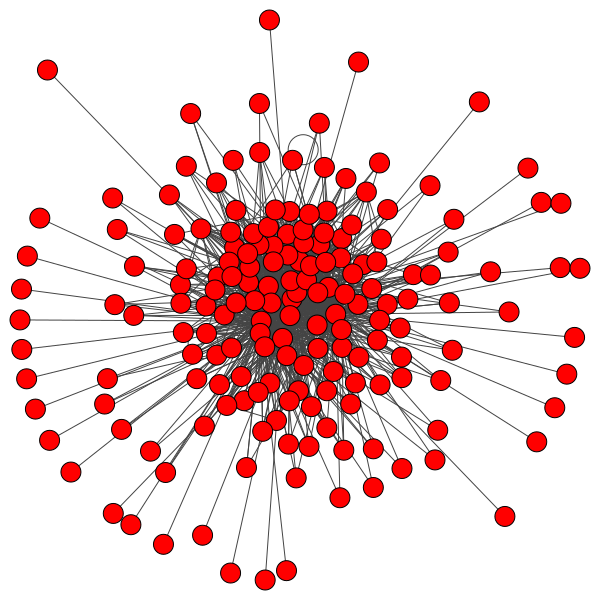

In [21]:
ig.plot(g)

In [22]:
g.diameter()

4

In [23]:
print( "Clustering Coefficient: ", g.transitivity_undirected())

Clustering Coefficient:  0.24672505151604357


In [24]:
np.mean(g.degree())

12.988505747126437

In [25]:
np.mean(g.strength(weights = 'weight'))

2489.183908045977

## Community Detection

### Louvain Community Detection

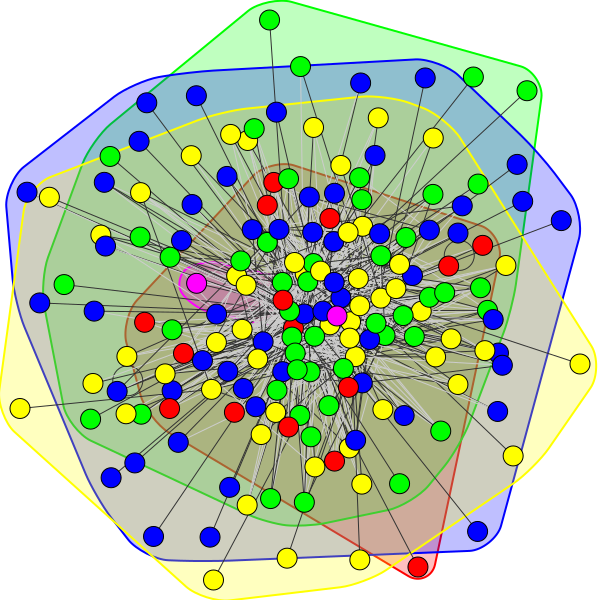

In [26]:
comm_louvain = g.community_multilevel(weights = 'weight')

ig.plot(comm_louvain, mark_groups = True, layout="drl")

In [27]:
modularity = g.modularity(comm_louvain, weights='weight')
print(modularity)

0.1603339407259909


In [28]:
df_louvain = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_louvain.membership } )
df_louvain

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          1
3    British Virgin Islands          2
4            Cayman Islands          3
..                      ...        ...
169               Venezuela          1
170                 Vietnam          3
171                   Yemen          1
172                  Zambia          2
173                Zimbabwe          2

[174 rows x 2 columns]

In [29]:
df_louvain.describe()

community
count  174.000000
mean     1.885057
std      0.978678
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      4.000000

In [30]:
df_louvain[df_louvain['community'] == 0]

name  community
0              Albania          0
1              Bahamas          0
27          Azerbaijan          0
28              Cyprus          0
31             Wyoming          0
42         Netherlands          0
60   US Virgin Islands          0
71             Denmark          0
80             Finland          0
129            Nigeria          0
136             Poland          0
141             Russia          0
157             Sweden          0
159              Syria          0
166            Ukraine          0

In [31]:
df_louvain[df_louvain['community'] == 1].head(99)

name  community
2                      Andorra          1
5                   Costa Rica          1
7                       Nevada          1
8                         Niue          1
9                       Panama          1
13                     Uruguay          1
16         Antigua and Barbuda          1
19                   Argentina          1
36                     Belgium          1
37                      Belize          1
46                     Bolivia          1
48                      Brazil          1
57                  Luxembourg          1
63                       Chile          1
65                    Colombia          1
70               Côte d'Ivoire          1
72                    Djibouti          1
73                    Dominica          1
74          Dominican Republic          1
75                     Ecuador          1
76                       Egypt          1
77                 El Salvador          1
84                     Germany          1
86                      Greece          1
88                   Guatemala          1
90                       Haiti          1
91                    Honduras          1
98                        Iran          1
107                     Kuwait          1
112                      Libya          1
113                  Lithuania          1
119                     Mexico          1
121                     Monaco          1
127                      Nauru          1
128                  Nicaragua          1
133                   Paraguay          1
134                       Peru          1
137                   Portugal          1
138                Puerto Rico          1
139                      Qatar          1
148  Sint Maarten (Dutch part)          1
149                   Slovakia          1
153                      Spain          1
155                      Sudan          1
158                Switzerland          1
169                  Venezuela          1
171                      Yemen          1

In [32]:
df_louvain[df_louvain['community'] == 2]

name  community
3        British Virgin Islands          2
6                     Hong Kong          2
12               United Kingdom          2
14                       Angola          2
17                     Barbados          2
21                        Aruba          2
25                  Isle of Man          2
29                        Malta          2
35                      Belarus          2
38                    Mauritius          2
39                       Jersey          2
40                      Liberia          2
41                Liechtenstein          2
43                    Singapore          2
44     Turks and Caicos Islands          2
50                       Brunei          2
54                    Gibraltar          2
56                     Guernsey          2
61     Central African Republic          2
62                         Chad          2
64                        China          2
66                      Croatia          2
67                         Cuba          2
69               Czech Republic          2
78                      Estonia          2
87                         Guam          2
89                       Guyana          2
95                      Iceland          2
99                      Ireland          2
102                     Jamaica          2
104                      Jordan          2
105                  Kazakhstan          2
106                       Kenya          2
108                  Kyrgyzstan          2
109                      Latvia          2
114                       Macao          2
116                      Malawi          2
118                        Mali          2
120                     Moldova          2
122                    Mongolia          2
123                  Montenegro          2
131                        Oman          2
142                 Saint Lucia          2
143  Saint Martin (French part)          2
147                     Vanuatu          2
151                South Africa          2
154                   Sri Lanka          2
156                    Suriname          2
160                      Taiwan          2
161                    Tanzania          2
162         Trinidad and Tobago          2
163                     Tunisia          2
164                      Turkey          2
165                      Uganda          2
168                  Uzbekistan          2
172                      Zambia          2
173                    Zimbabwe          2

In [33]:
df_louvain[df_louvain['community'] == 3]

name  community
4                      Cayman Islands          3
10                              Samoa          3
11                         Seychelles          3
15                            Bermuda          3
18              Saint Kitts and Nevis          3
20                        New Zealand          3
22                   British Anguilla          3
23                          Australia          3
24                       Cook Islands          3
26                            Austria          3
30               Netherlands Antilles          3
32                            Bahrain          3
33               United Arab Emirates          3
34                         Bangladesh          3
45                      United States          3
47                           Botswana          3
49                  State of Delaware          3
51                           Bulgaria          3
52                           Cameroon          3
53                             Canada          3
55                            Grenada          3
58                   Marshall Islands          3
59   Saint Vincent and the Grenadines          3
68                            Curaçao          3
79                               Fiji          3
81                             France          3
82                      French Guiana          3
83                            Georgia          3
85                              Ghana          3
93                           Thailand          3
94                            Hungary          3
96                              India          3
97                          Indonesia          3
100                            Israel          3
101                             Italy          3
103                             Japan          3
110                           Lebanon          3
111                           Lesotho          3
115                         Macedonia          3
124                           Morocco          3
125                        Mozambique          3
126                           Namibia          3
130                            Norway          3
132                          Pakistan          3
135                       Philippines          3
140                           Romania          3
144                      Saudi Arabia          3
145                           Senegal          3
146                      Sierra Leone          3
150                          Slovenia          3
152                       South Korea          3
167                             Dubai          3
170                           Vietnam          3

In [34]:
df_louvain[df_louvain['community'] == 4]

name  community
92     Labuan          4
117  Malaysia          4

In [35]:
# Define colors used for visualization
colors = ['blue', 'yellow', 'green','purple', 'pink', 'orange', 'lightcoral', 'plum', 'darkgreen', 'darkblue', 'rosybrown',
         'crimson', 'steelblue', 'khaki', 'moccasin', 'orangered', 'fuchsia', 'thistle', 'salmon', 'chocolate', 'lightseagreen',
         'springgreen', 'darkseagreen', 'deeppink', 'mediumvioletred','olive']

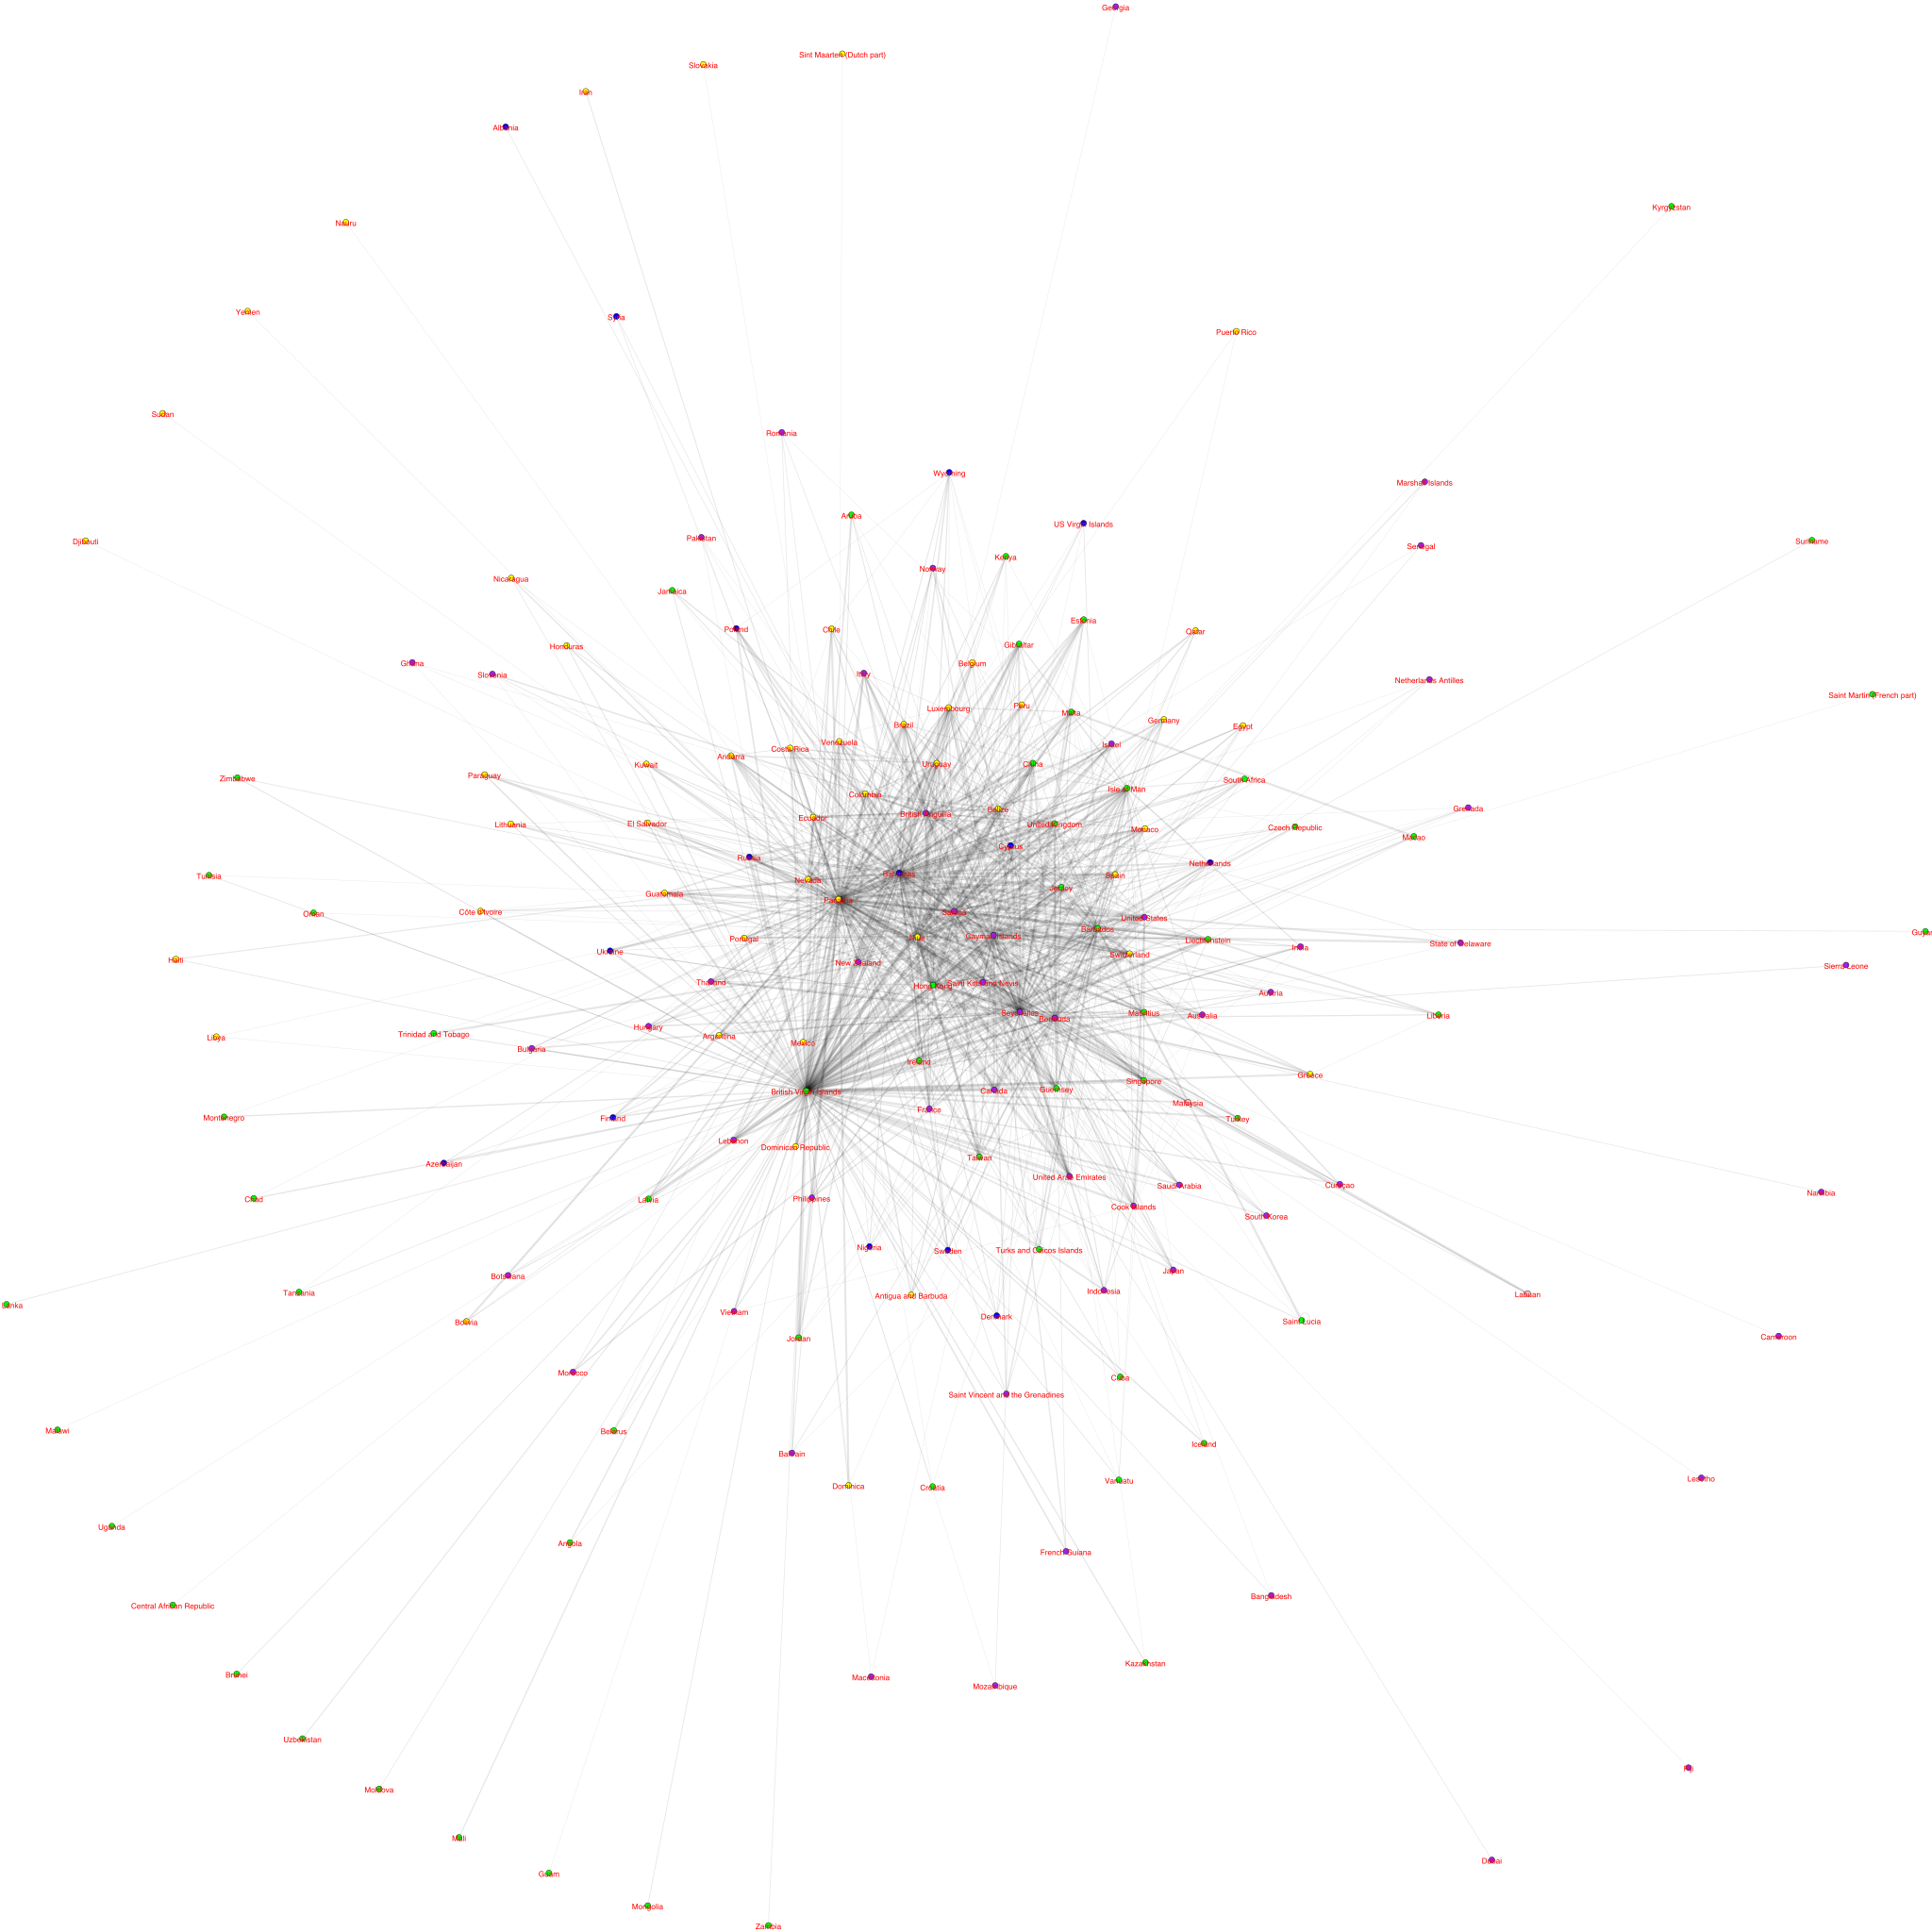

In [36]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_louvain.membership)):
    vertex_colors.append(colors[comm_louvain.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_images/louvain_communities.png', vertex_label = g.vs['name'] , **visual_style)

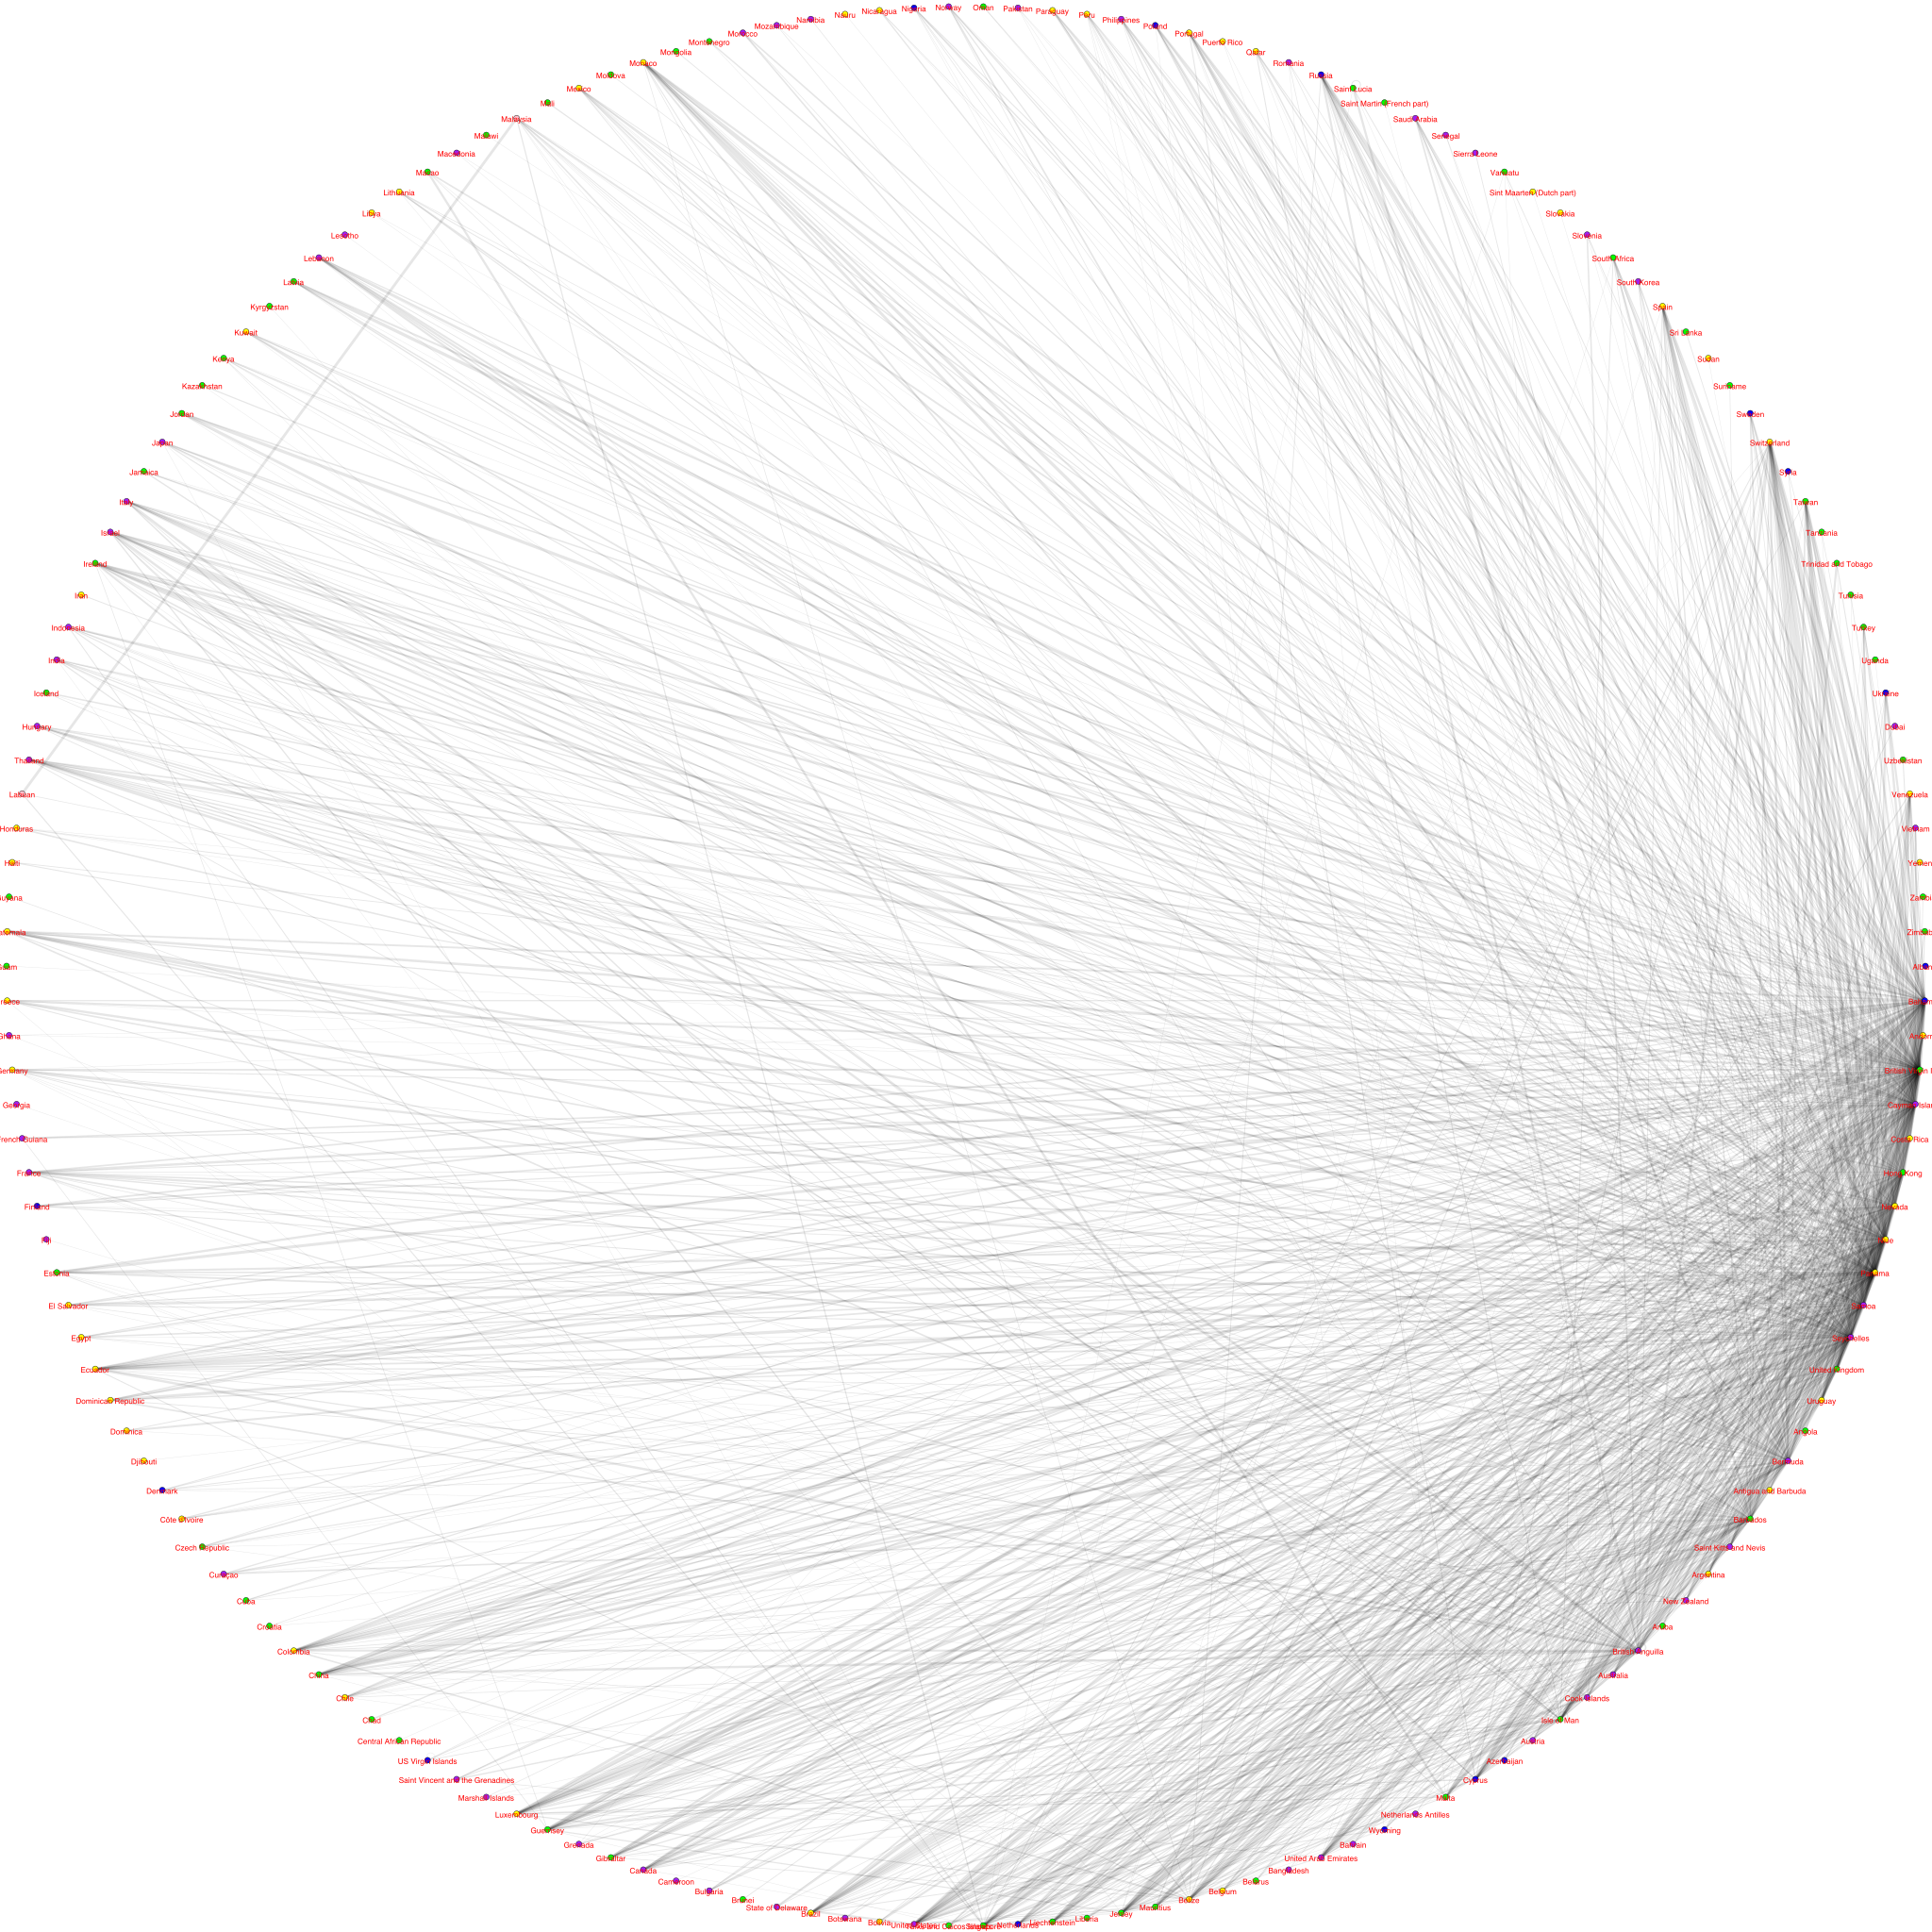

In [37]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_images/louvain_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [38]:
for i in range(len(comm_louvain.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_louvain.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_louvain.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_louvain.subgraphs()[i],'jur_images/louvain_subgraph' + str(i) + '.png' ,vertex_label = comm_louvain.subgraphs()[i].vs['name'],**visual_style  )
    
    
    

In [39]:
# # Set vertex colours

# visual_style["bbox"] = (300,300)
# visual_style["margin"] = 17
# visual_style["vertex_color"] = 'orange'

# # Set vertex label size
# visual_style["vertex_label_size"] = 15

# # Set the layout
# my_layout = comm_louvain.cluster_graph().layout_fruchterman_reingold()
# visual_style["layout"] = my_layout

# ig.plot(comm_louvain.cluster_graph(),'jur_images/test_cluster_graph.png' ,vertex_label = range(comm_louvain.cluster_graph().vcount()),**visual_style  )


### Label Propogation Community Detection

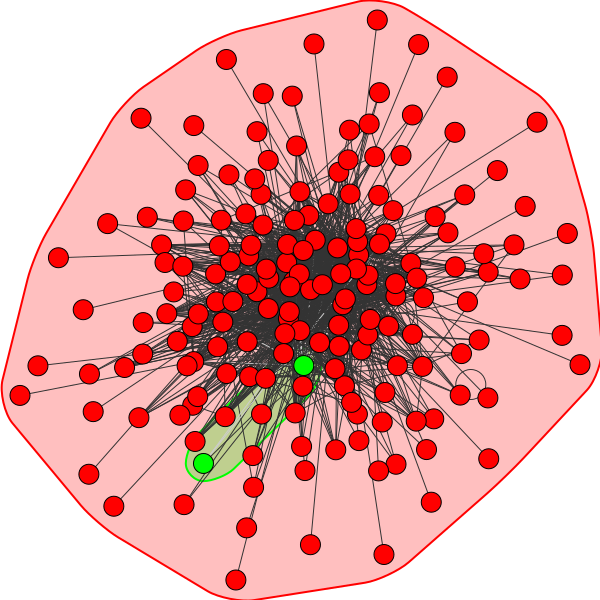

In [40]:
comm_lp= g.community_label_propagation(weights = 'weight')

ig.plot(comm_lp, mark_groups = True, layout="drl")

In [41]:
modularity = g.modularity(comm_lp, weights='weight')
print(modularity)

0.003888080328497982


### Leading Eigenvector Community Detection

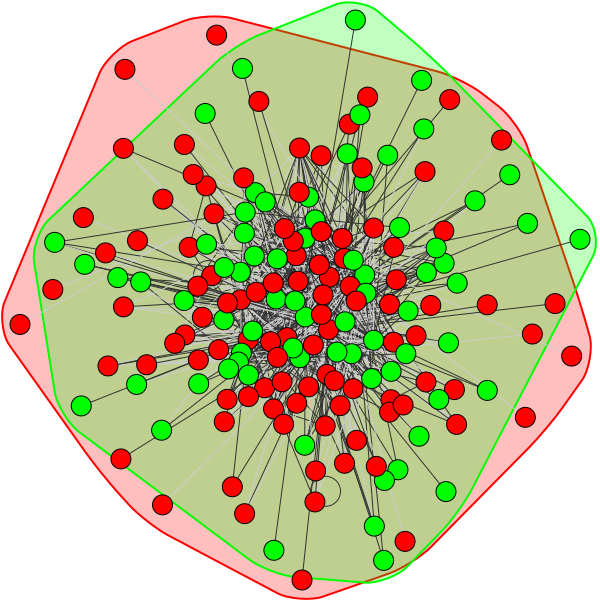

In [42]:
comm_leading_eigenvector= g.community_leading_eigenvector(weights = 'weight')

ig.plot(comm_leading_eigenvector, mark_groups = True, layout="drl")

In [43]:
modularity = g.modularity(comm_leading_eigenvector, weights='weight')
print(modularity)

0.1323189128776745


In [44]:
df_leading_eigenvector = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_leading_eigenvector.membership } )
df_leading_eigenvector

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          0
3    British Virgin Islands          1
4            Cayman Islands          1
..                      ...        ...
169               Venezuela          0
170                 Vietnam          1
171                   Yemen          0
172                  Zambia          1
173                Zimbabwe          0

[174 rows x 2 columns]

In [45]:
df_leading_eigenvector.describe()

community
count  174.000000
mean     0.413793
std      0.493934
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000

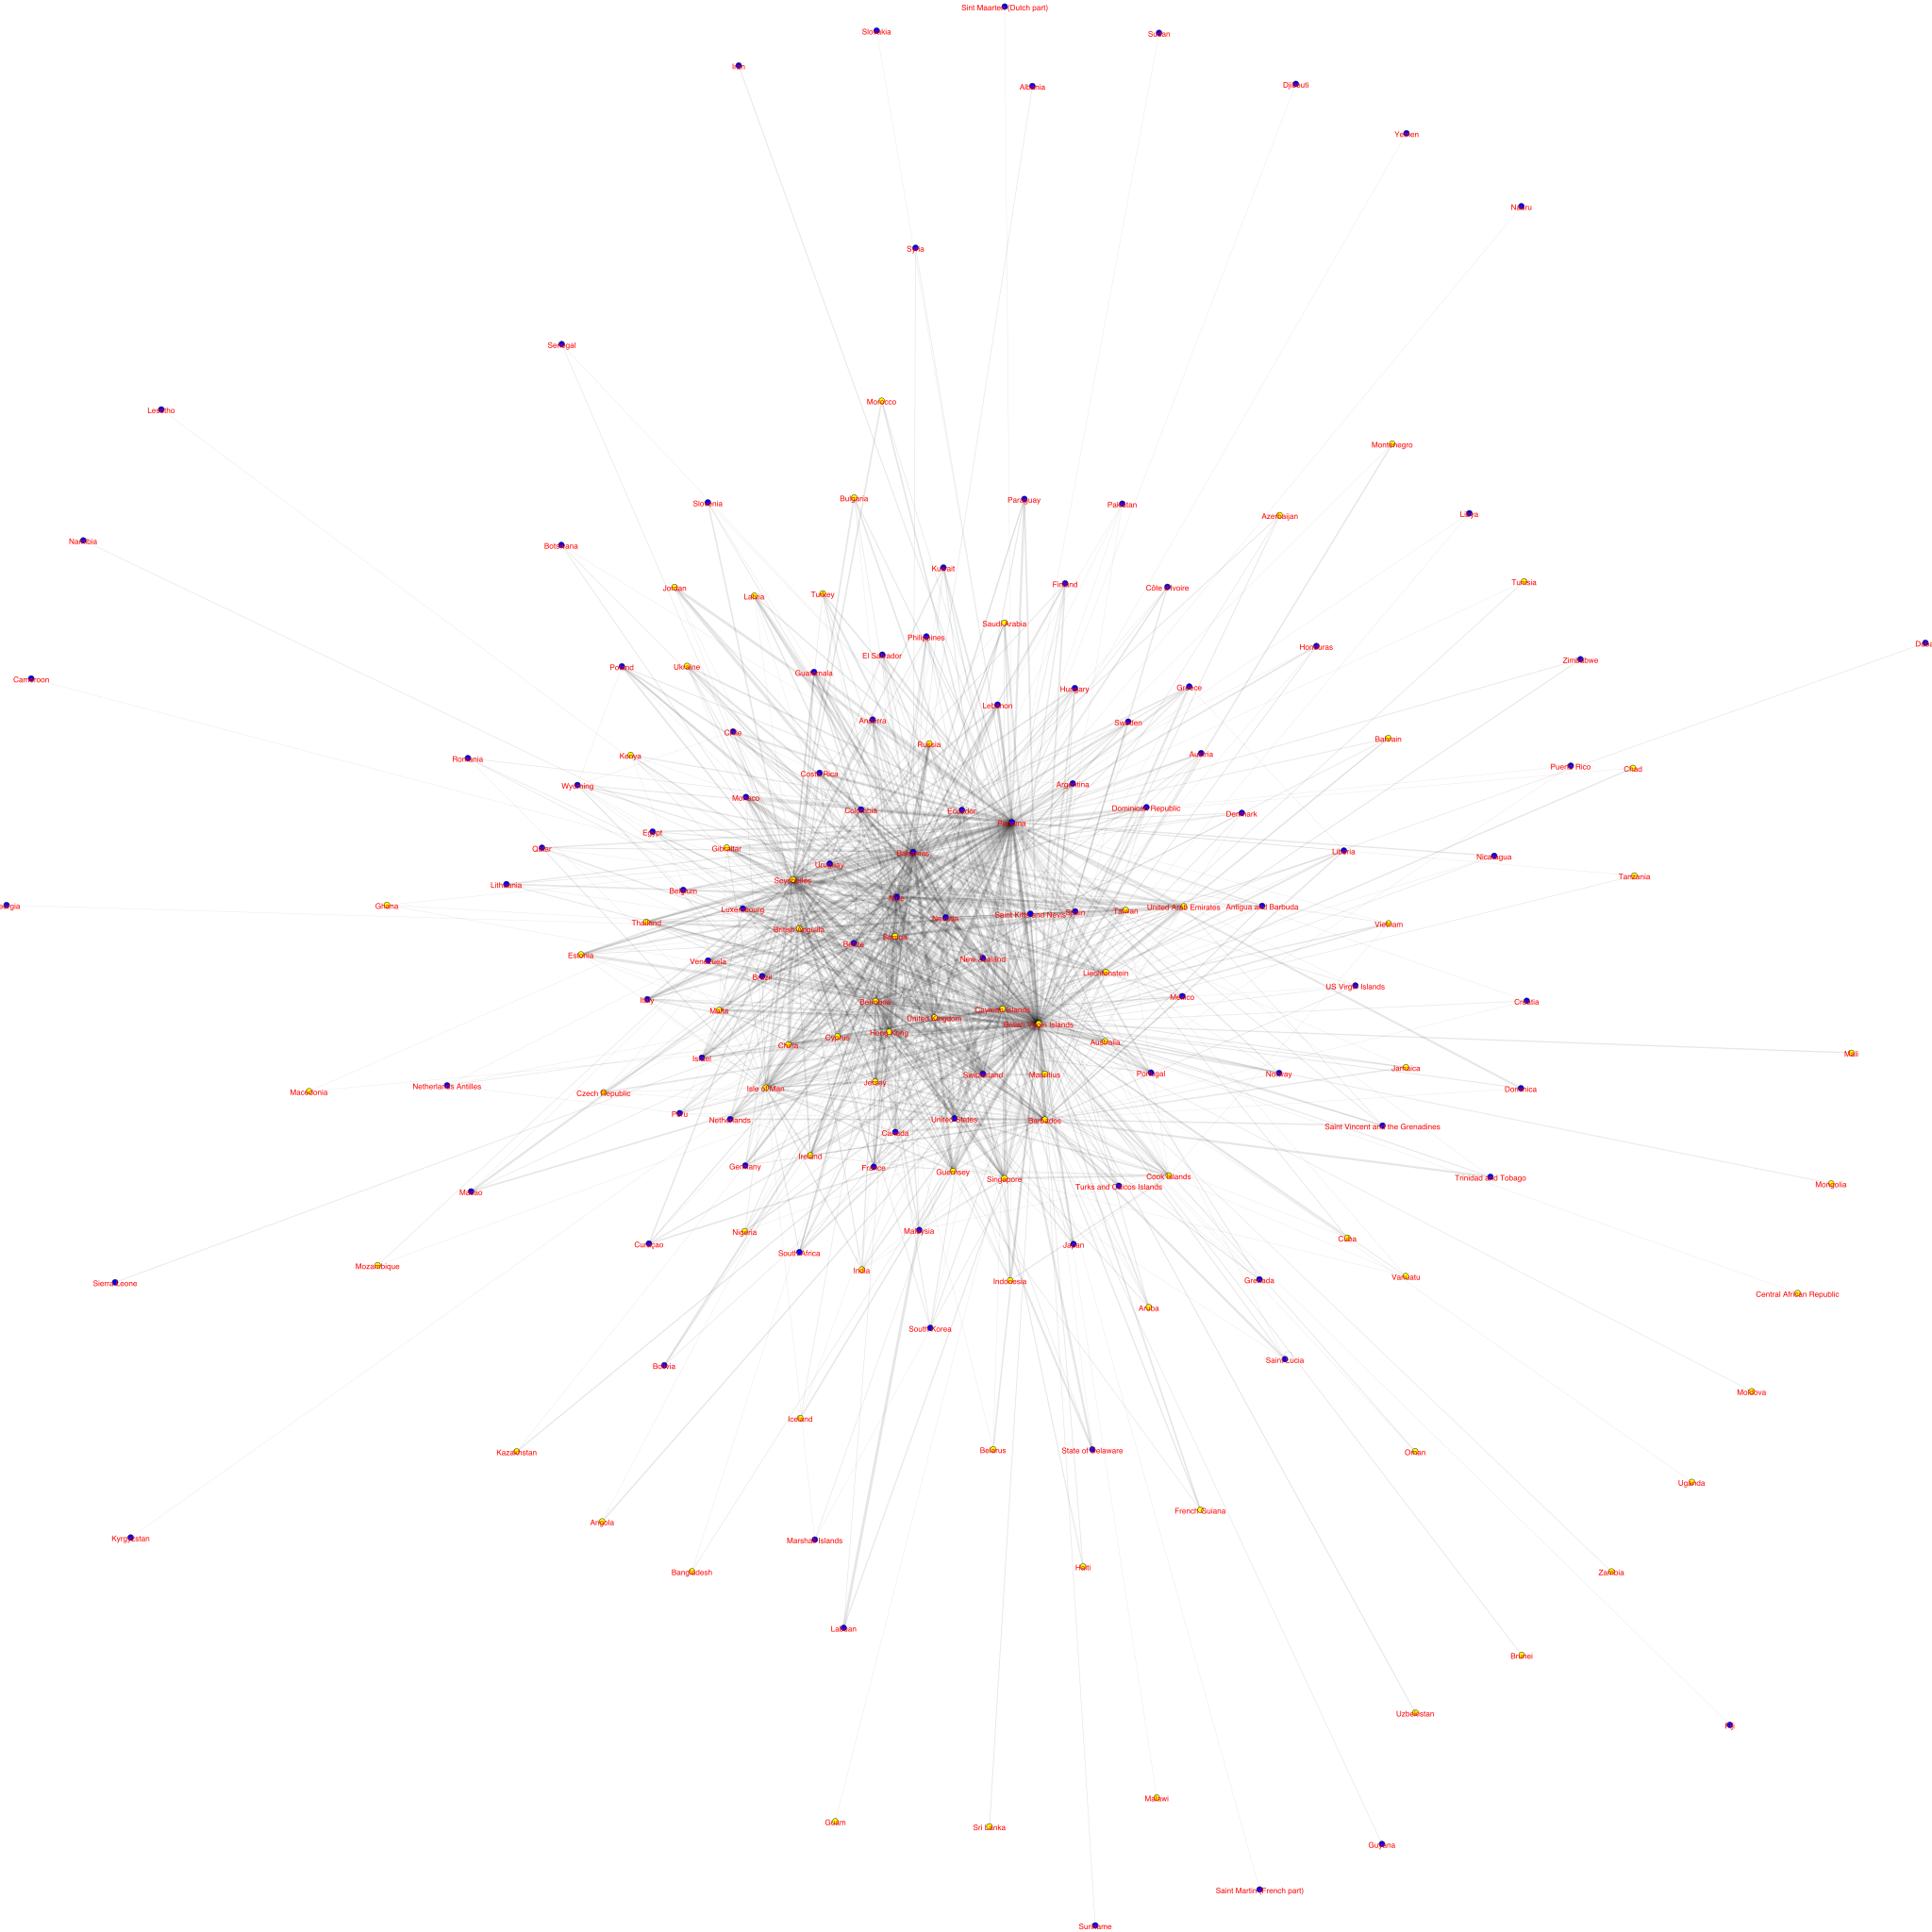

In [46]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_leading_eigenvector.membership)):
    vertex_colors.append(colors[comm_leading_eigenvector.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_images/communities_leading_eigenvector.png', vertex_label = g.vs['name'] , **visual_style)

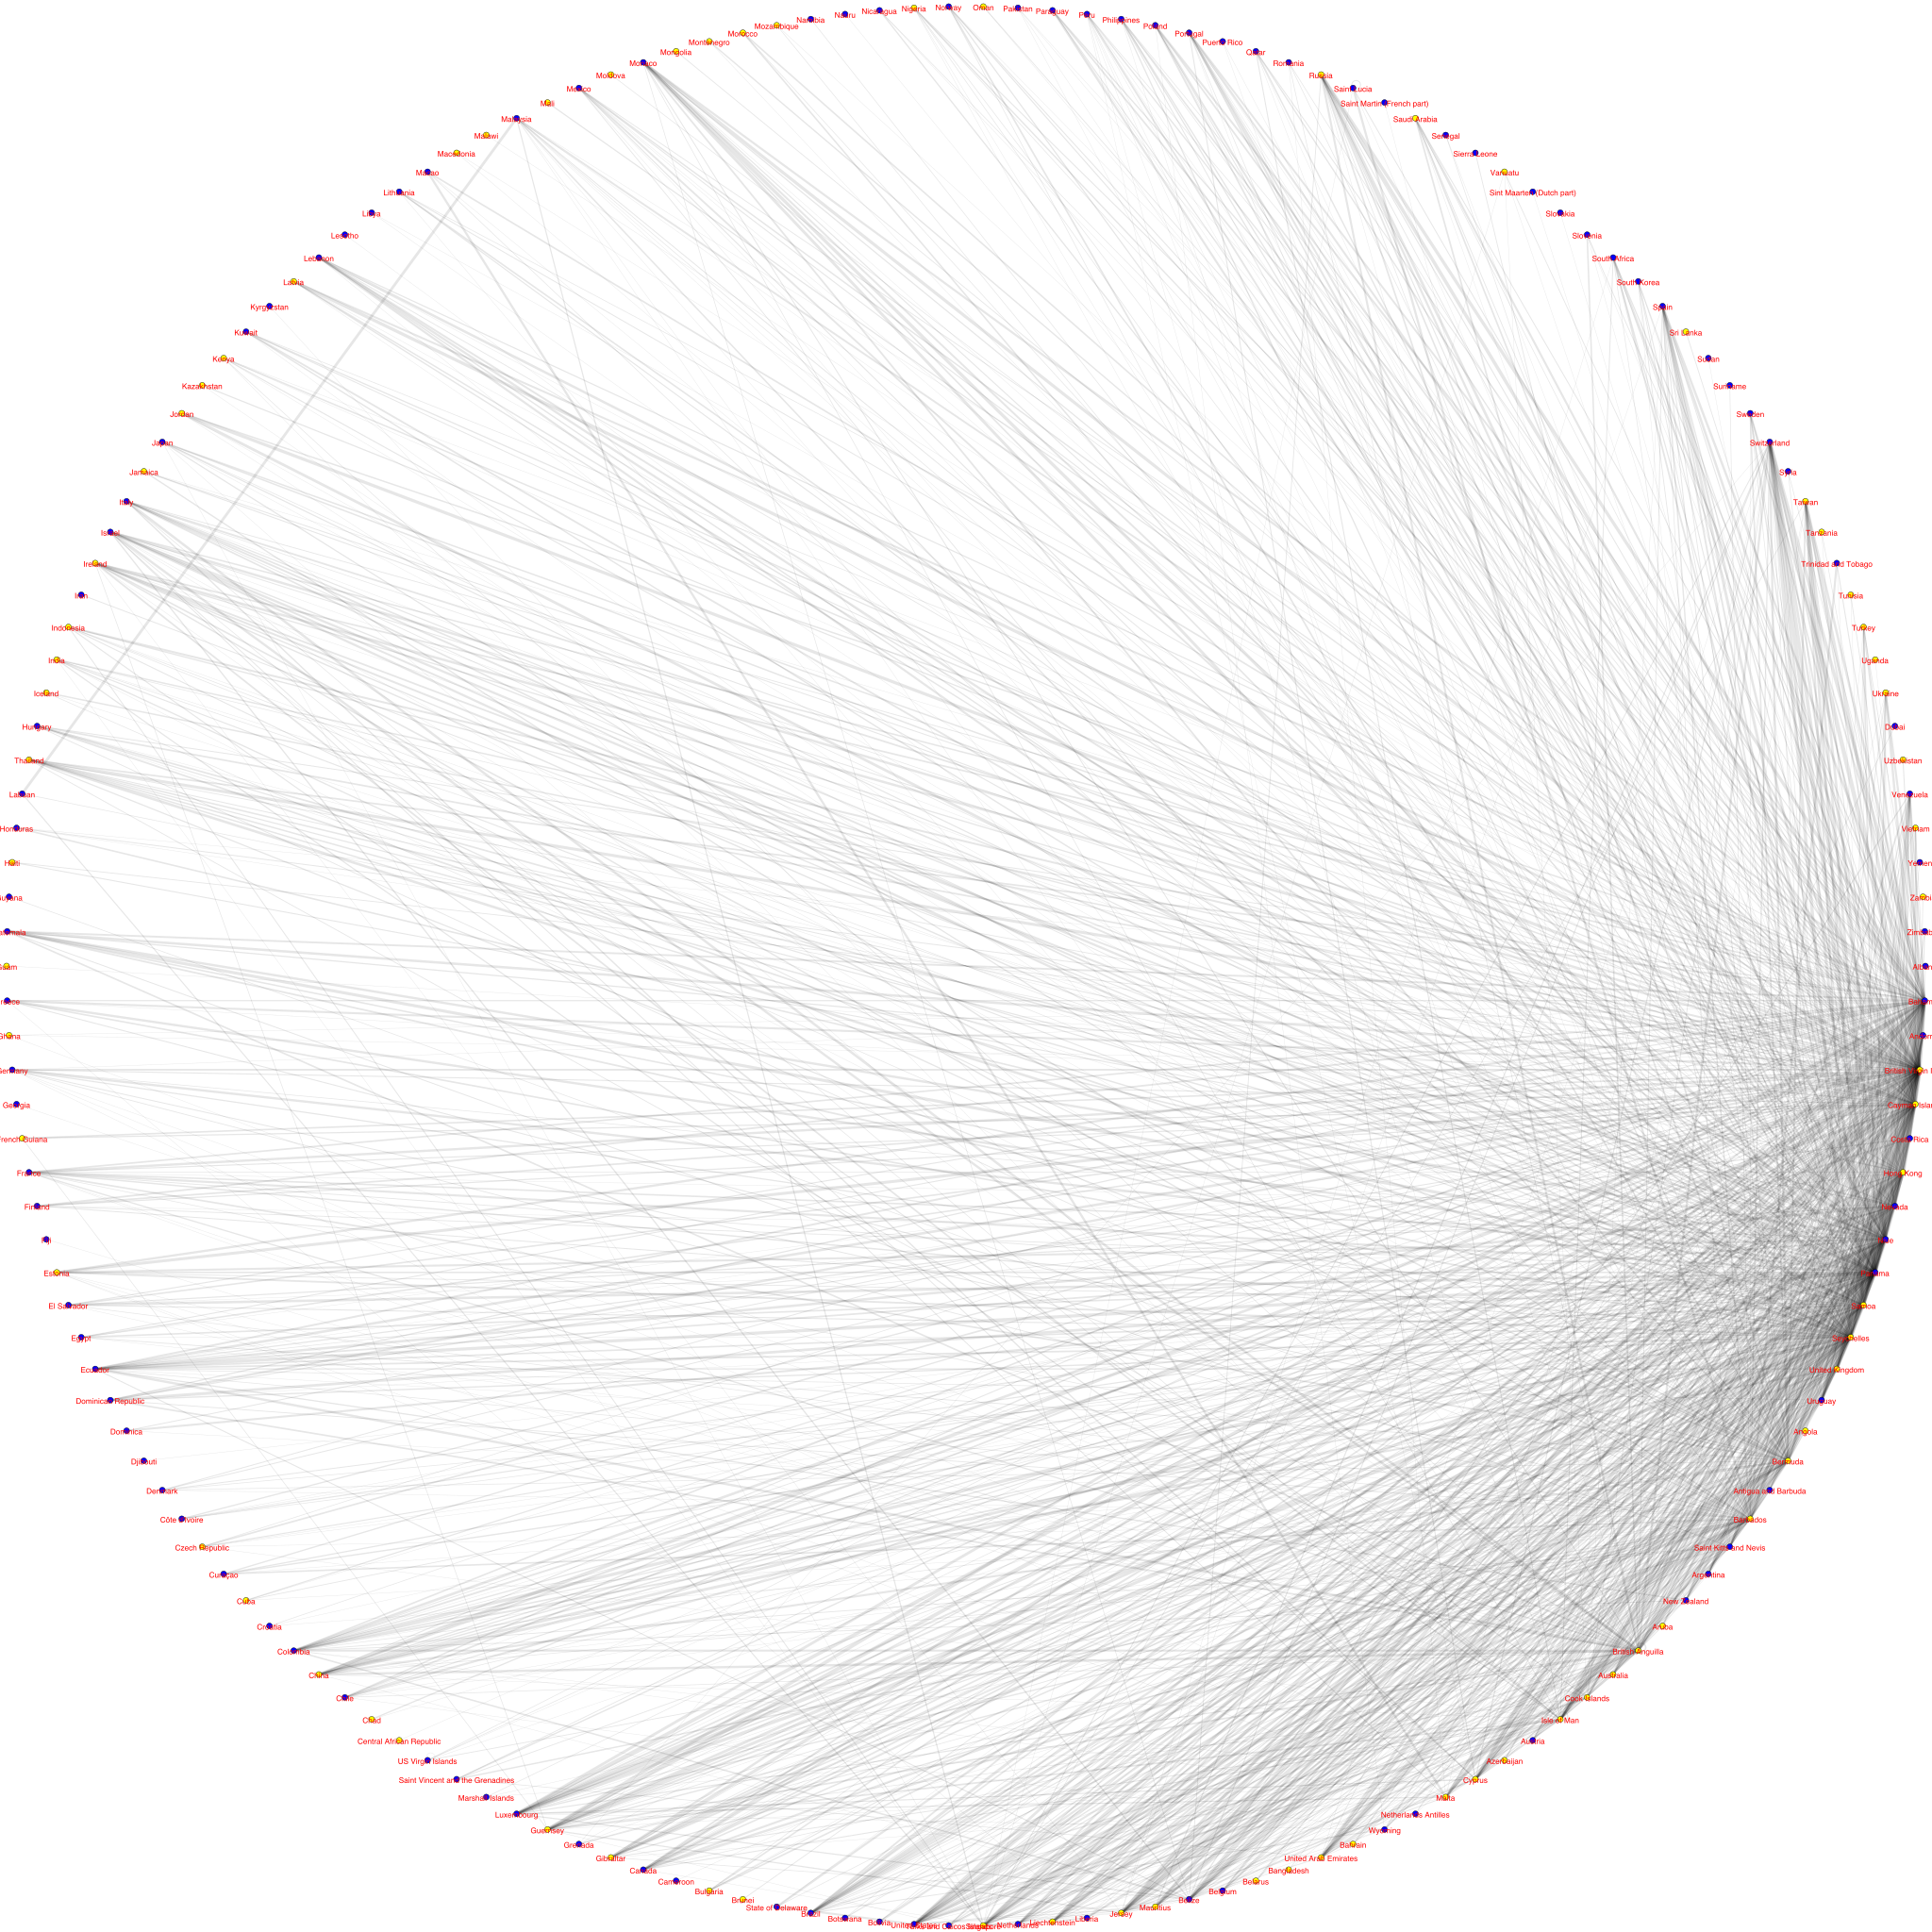

In [47]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_images/leading_vector_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [48]:
for i in range(len(comm_leading_eigenvector.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_leading_eigenvector.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_leading_eigenvector.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_leading_eigenvector.subgraphs()[i],'jur_images/leading_eigenvector_subgraph' + str(i) + '.png' ,vertex_label = comm_leading_eigenvector.subgraphs()[i].vs['name'],**visual_style  )
    

### Leiden Community Detection

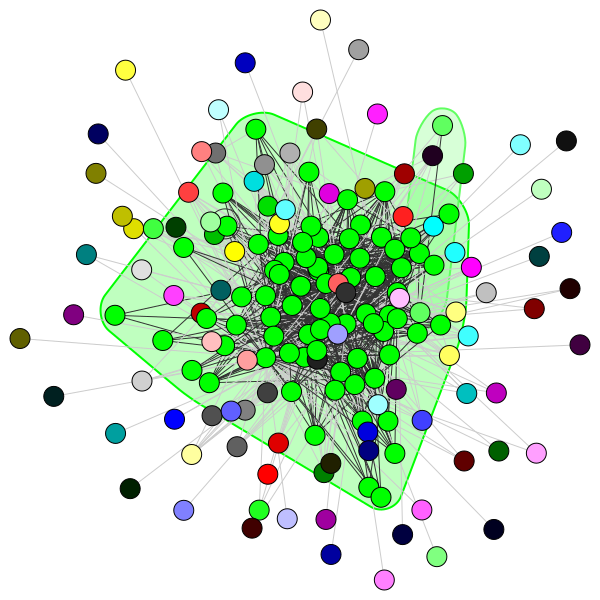

In [49]:
comm_leiden = g.community_leiden(weights = 'weight')

ig.plot(comm_leiden, mark_groups = True, layout="drl")

In [50]:
modularity = g.modularity(comm_leiden, weights='weight')
print(modularity)

0.0038620588629392967


In [51]:
df_leiden = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_leiden.membership } )
df_leiden

name  community
0                   Albania          0
1                   Bahamas          1
2                   Andorra          1
3    British Virgin Islands          1
4            Cayman Islands          1
..                      ...        ...
169               Venezuela          1
170                 Vietnam         95
171                   Yemen         96
172                  Zambia         97
173                Zimbabwe         98

[174 rows x 2 columns]

In [52]:
df_leiden.describe()

community
count  174.000000
mean    28.551724
std     32.132946
min      0.000000
25%      1.000000
50%     12.500000
75%     54.750000
max     98.000000

In [46]:
## no visualisation as most communities are individual?

### Optimal Modularity Community Detection

In [47]:
# #SLOW

# comm_opt_modularity = g.community_optimal_modularity(weights = 'weight')

# ig.plot(comm_opt_modularity, mark_groups = True, layout="drl")

In [48]:
# modularity = g.modularity(comm_opt_modularity, weights='weight')
# print(modularity)

In [49]:
# df_opt_modularity = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_opt_modularity.membership } )
# df_opt_modularity

In [50]:
# df_opt_modularity.describe

In [51]:
# ##plot community
# visual_style = {}

# vertex_colors = []

# for i in range(len(df_opt_modularity.membership)):
#     vertex_colors.append(colors[df_opt_modularity.membership[i]])
    
# # Set bbox and margin
# visual_style["bbox"] = (5000,5000)
# visual_style["margin"] = 17

# # Set vertex colours
# visual_style["vertex_color"] = vertex_colors

# # Set edge width
# visual_style["edge_width"] = np.log(g.es['weight']) + 1

# # Set edge color
# visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# # Set vertex size
# visual_style["vertex_size"] = 15

# # Set vertex label size
# visual_style["vertex_label_size"] = 20

# # Set vertex label color
# visual_style["vertex_label_color"] = 'red'

# # Don't curve the edges
# visual_style["edge_curved"] = False

# # Set the layout
# my_layout = g.layout_fruchterman_reingold()
# visual_style["layout"] = my_layout

# # Plot the graph
# ig.plot(g,'jur_images/communities_optimal_modularity.png', vertex_label = g.vs['name'] , **visual_style)

In [52]:
# # Set the layout
# my_layout = g.layout_circle()
# visual_style["layout"] = my_layout

# # Plot the graph
# ig.plot(g,'jur_images/optimal_modularity_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [53]:
# for i in range(len(optimal_modularity.subgraphs())):
    
#     visual_style["bbox"] = (2000,2000)
#     visual_style["margin"] = 17
    
#     # Set vertex colours
#     visual_style["vertex_color"] = 'green'

#     # Set edge width
#     visual_style["edge_width"] = np.log(optimal_modularity.subgraphs()[i].es['weight']) + 1
#     # Set the layout
#     my_layout = optimal_modularity_circular.subgraphs()[i].layout_fruchterman_reingold()
#     visual_style["layout"] = my_layout

#     ig.plot(optimal_modularity_circular.subgraphs()[i],'jur_images/optimal_modularity_subgraph' + str(i) + '.png' ,vertex_label = optimal_modularity.subgraphs()[i].vs['name'],**visual_style  )
    

### Spinglass Community Detection

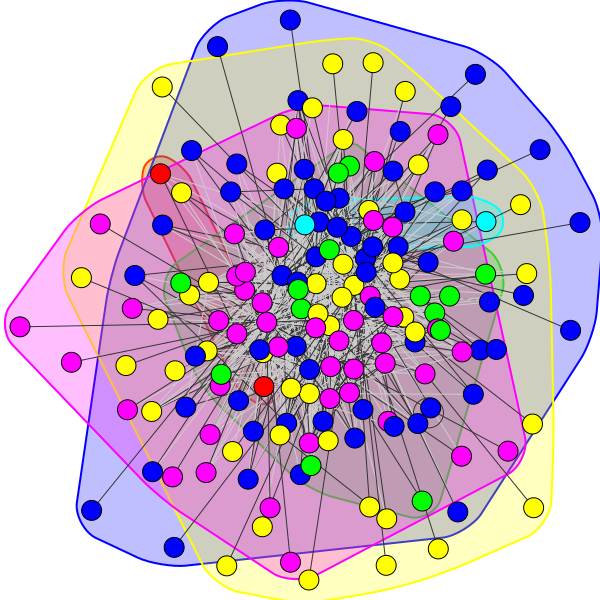

In [53]:
comm_spinglass = g.community_spinglass(weights = 'weight')

ig.plot(comm_spinglass, mark_groups = True, layout="drl")

In [54]:
modularity = g.modularity(comm_spinglass, weights='weight')
print(modularity)

0.16364230983730685


In [55]:
df_spinglass = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_spinglass.membership } )
df_spinglass

name  community
0                   Albania          1
1                   Bahamas          1
2                   Andorra          4
3    British Virgin Islands          3
4            Cayman Islands          2
..                      ...        ...
169               Venezuela          4
170                 Vietnam          2
171                   Yemen          4
172                  Zambia          3
173                Zimbabwe          3

[174 rows x 2 columns]

In [56]:
df_spinglass.describe()

community
count  174.000000
mean     2.718391
std      1.012069
min      0.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000

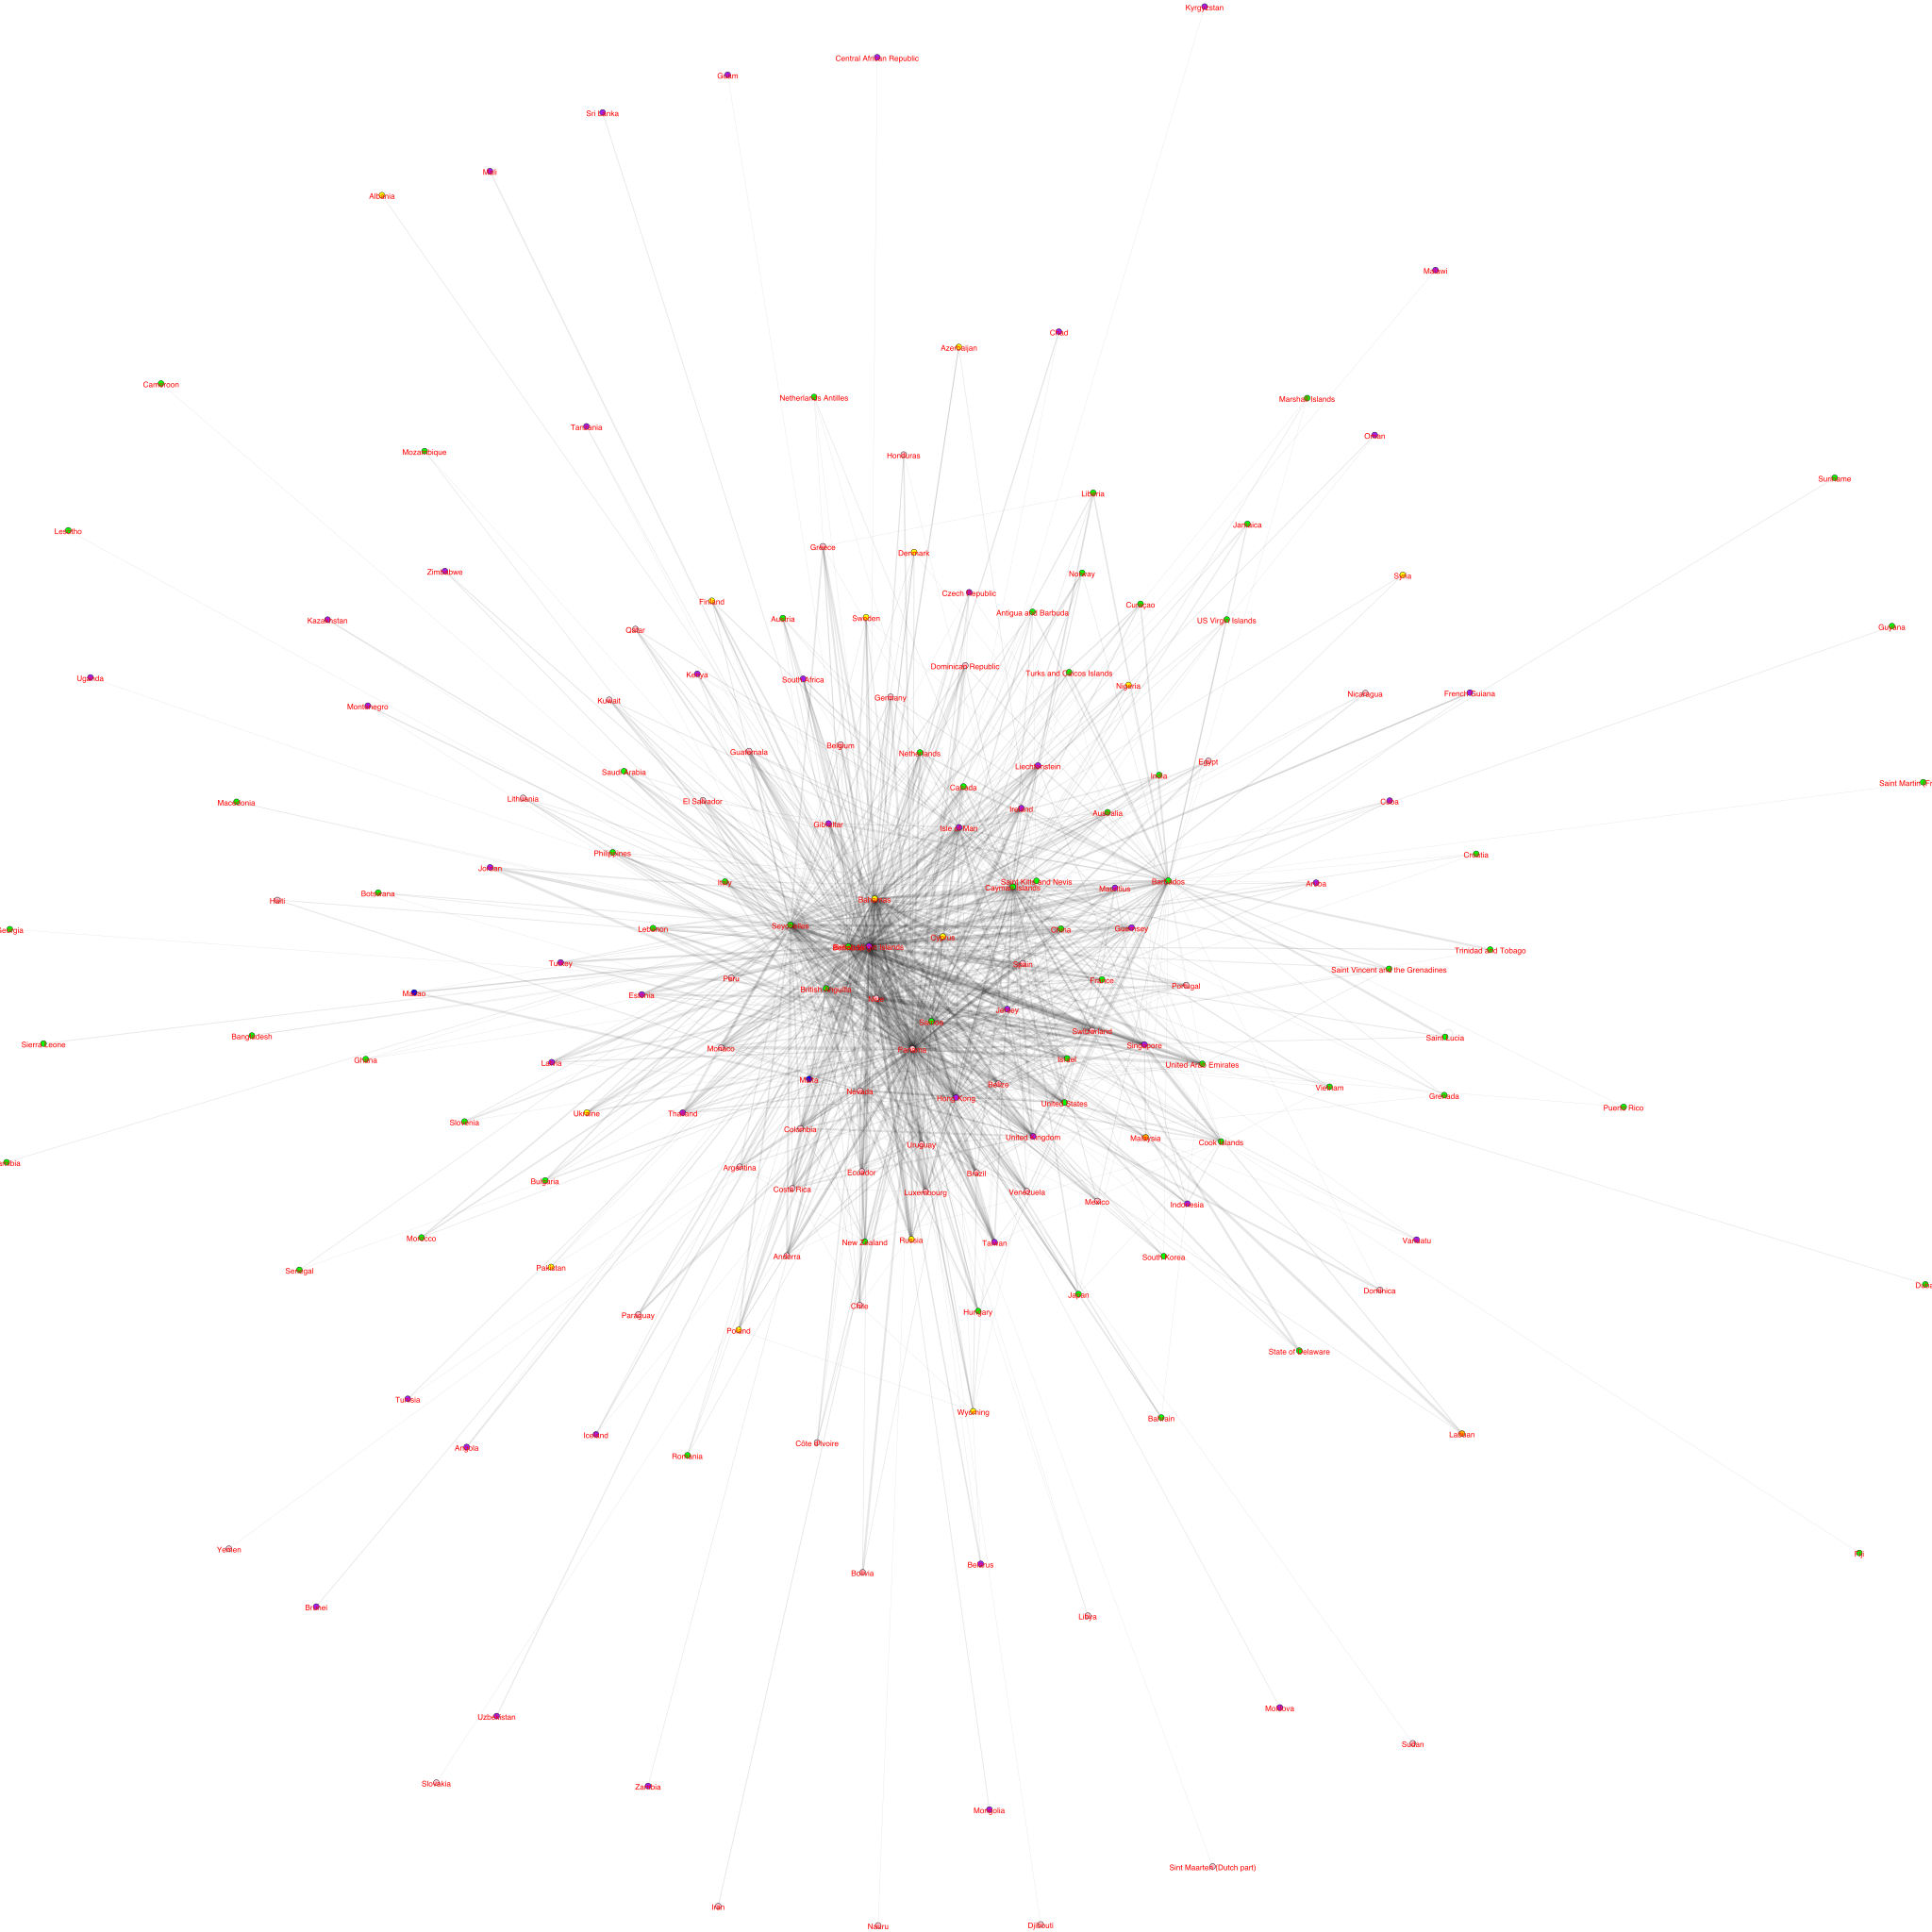

In [57]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_spinglass.membership)):
    vertex_colors.append(colors[comm_spinglass.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_images/communities_spinglass.png', vertex_label = g.vs['name'] , **visual_style)

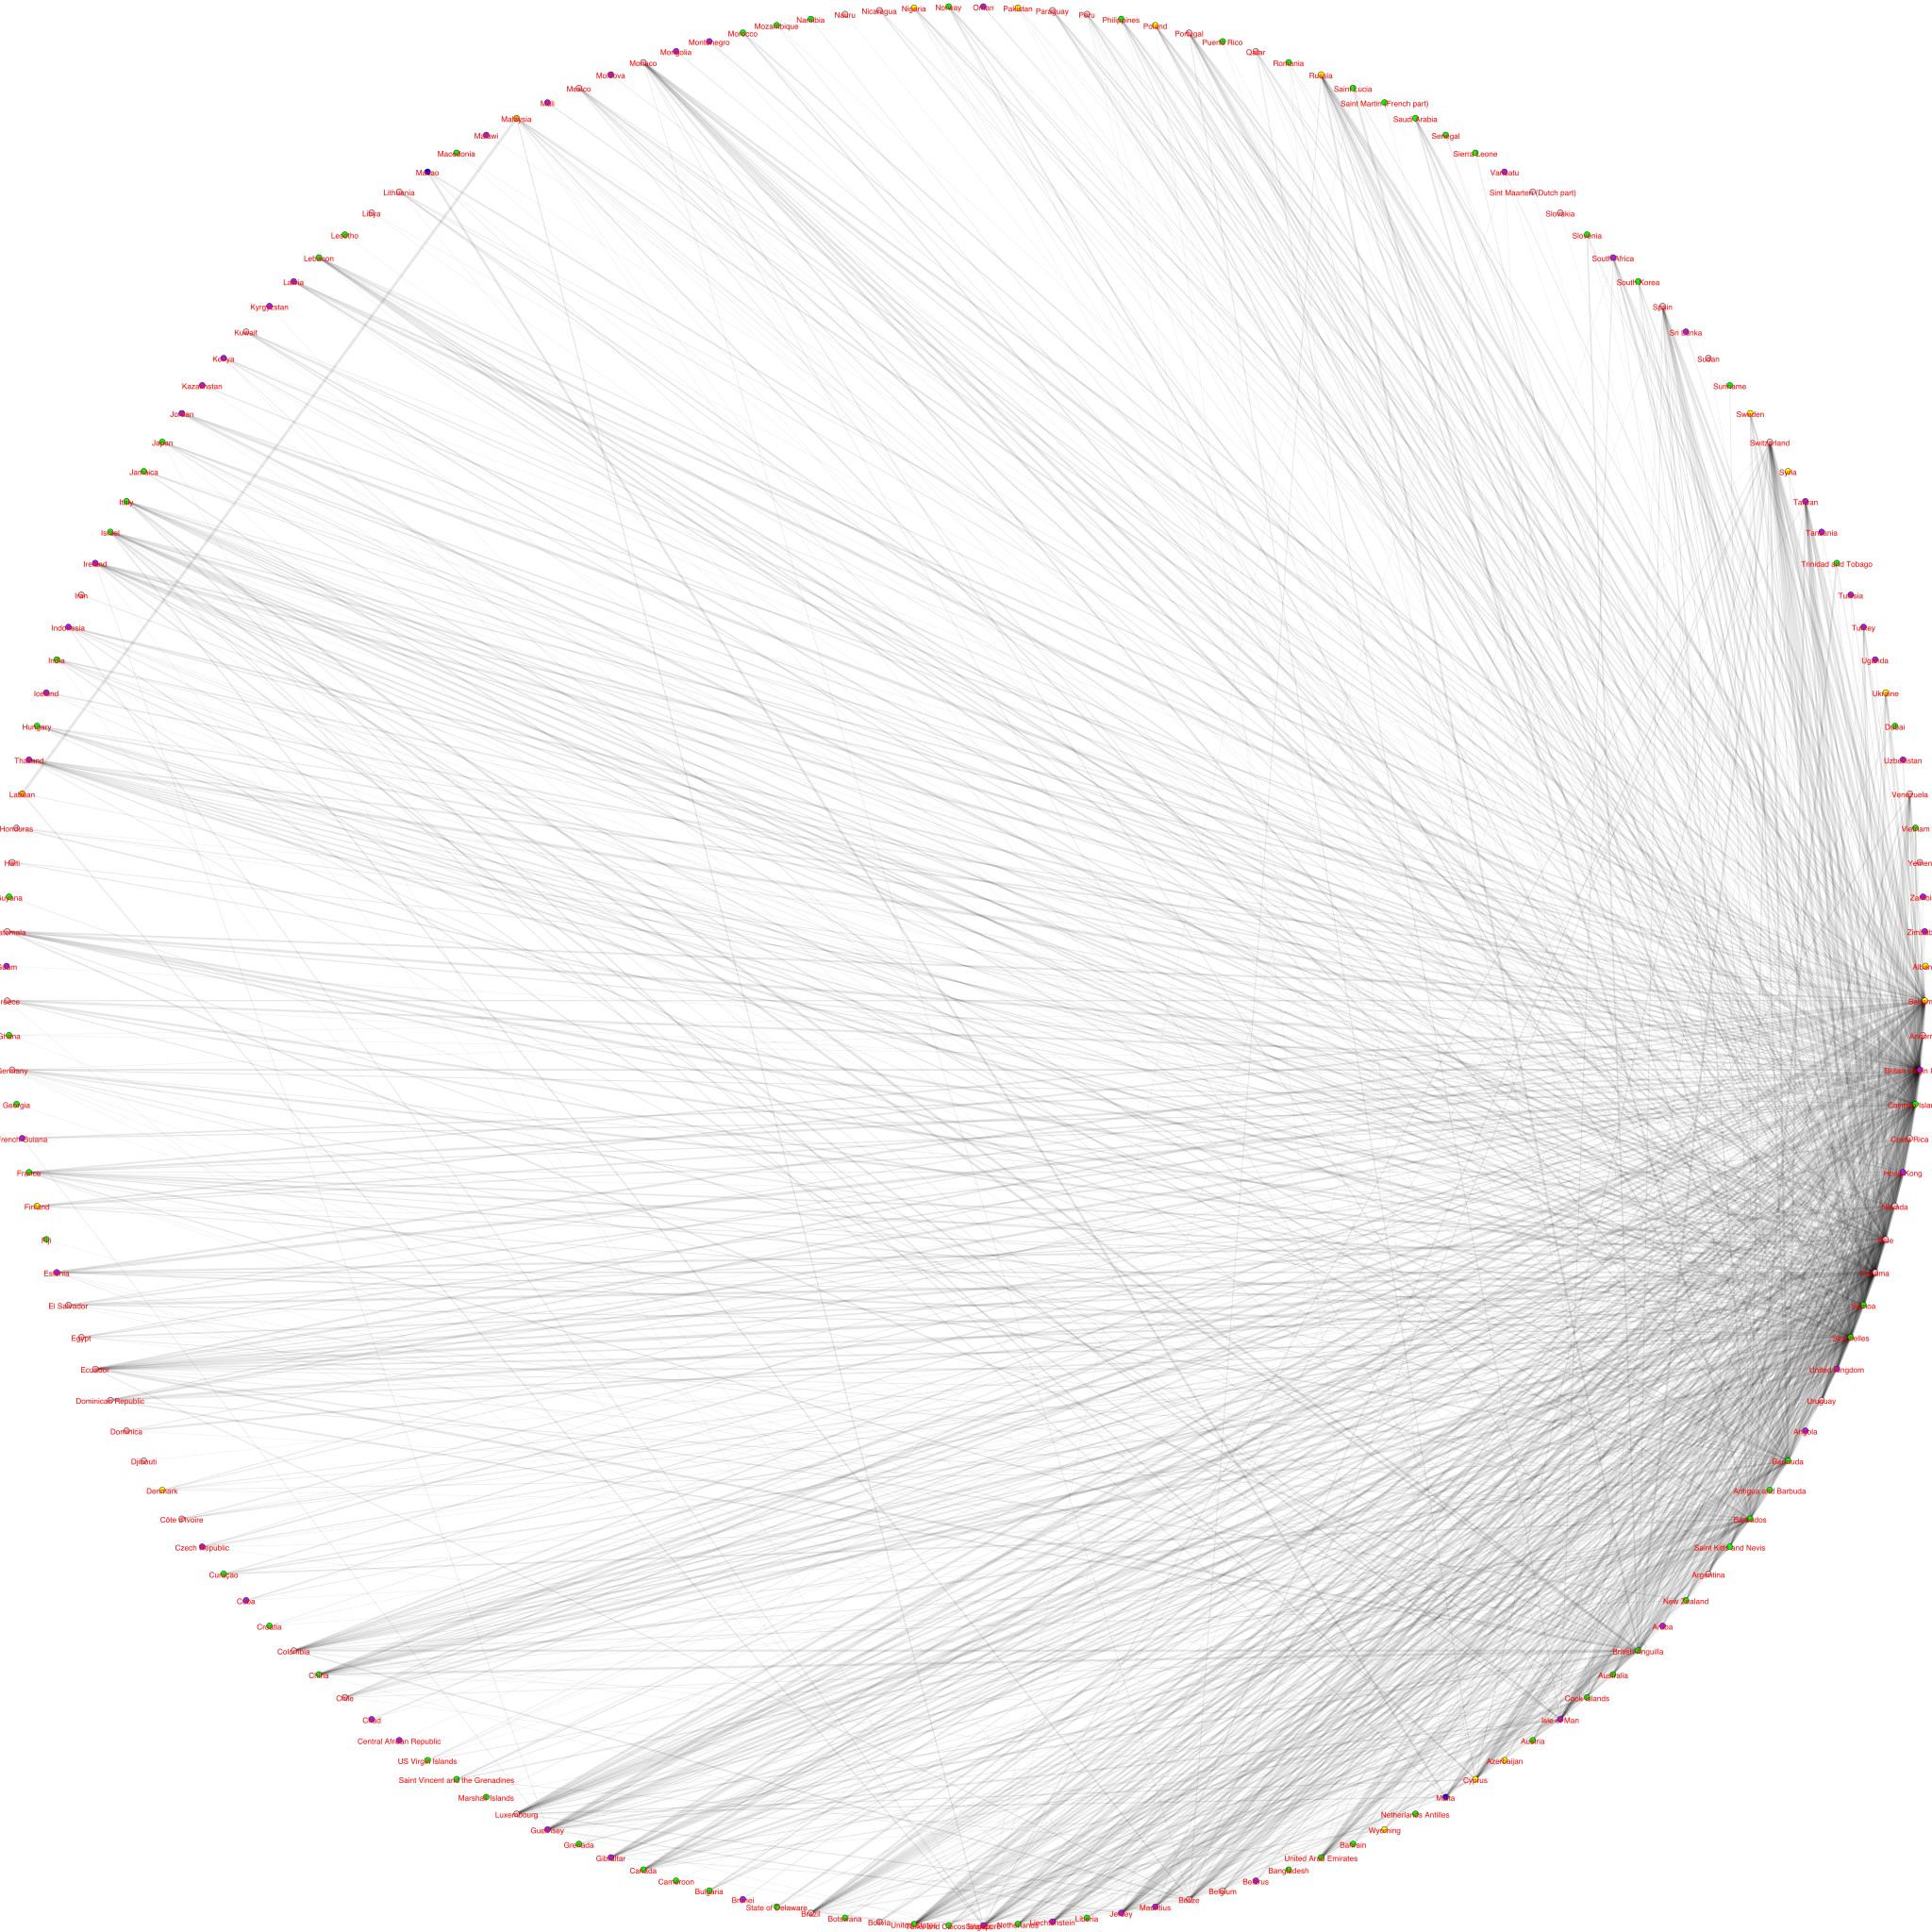

In [58]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_images/spinglass_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [59]:
for i in range(len(comm_spinglass.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_spinglass.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_spinglass.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_spinglass.subgraphs()[i],'jur_images/spinglass_subgraph' + str(i) + '.png' ,vertex_label = comm_spinglass.subgraphs()[i].vs['name'],**visual_style  )
    

### Walktrap Community Detection

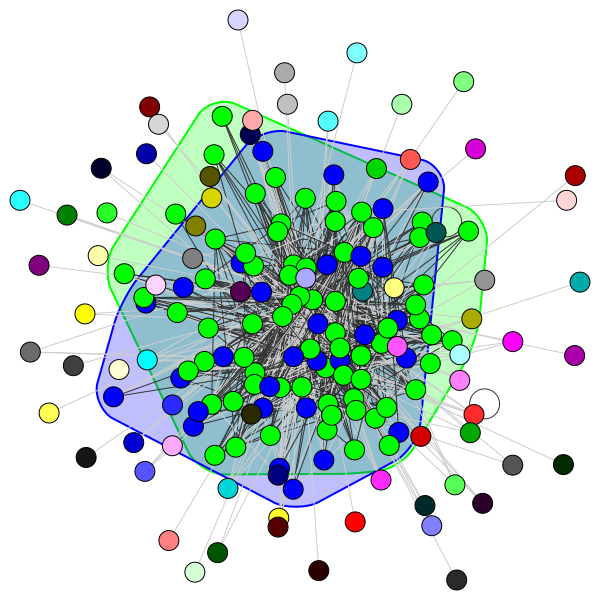

In [60]:
walktrap = g.community_walktrap(weights = 'weight', steps = 2)

comm_walktrap = walktrap.as_clustering()

ig.plot(comm_walktrap, mark_groups = True, layout="drl")

In [61]:
modularity = g.modularity(comm_walktrap, weights='weight')
print(modularity)

0.02637219748719517


In [62]:
df_walktrap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_walktrap.membership } )
df_walktrap

name  community
0                   Albania          0
1                   Bahamas          1
2                   Andorra          1
3    British Virgin Islands          1
4            Cayman Islands          2
..                      ...        ...
169               Venezuela          1
170                 Vietnam          2
171                   Yemen         72
172                  Zambia         73
173                Zimbabwe         74

[174 rows x 2 columns]

In [63]:
df_walktrap.describe()

community
count  174.000000
mean    16.683908
std     22.754992
min      0.000000
25%      1.000000
50%      2.000000
75%     30.750000
max     74.000000

In [64]:
## no visualisation since too many communities, mostly individual

### Infomap Community Detection

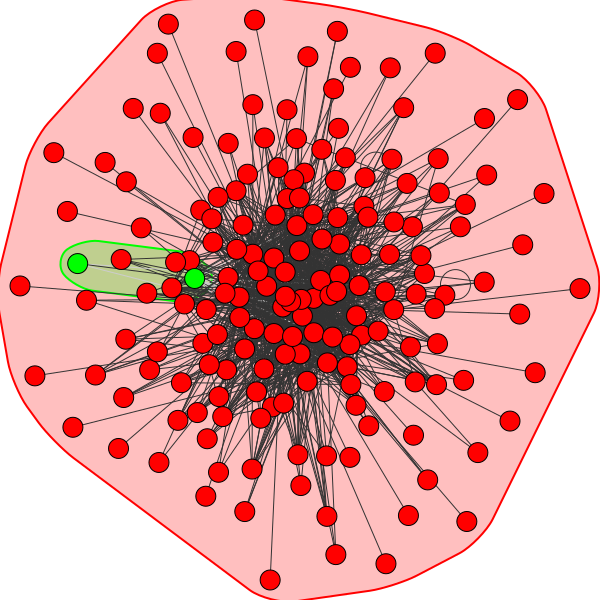

In [65]:
comm_infomap = g.community_infomap(edge_weights = 'weight')

ig.plot(comm_infomap, mark_groups = True, layout="drl")

In [66]:
modularity = g.modularity(comm_infomap, weights='weight')
print(modularity)

0.003888080328497982


In [67]:
df_infomap = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_infomap.membership } )
df_infomap

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          0
3    British Virgin Islands          0
4            Cayman Islands          0
..                      ...        ...
169               Venezuela          0
170                 Vietnam          0
171                   Yemen          0
172                  Zambia          0
173                Zimbabwe          0

[174 rows x 2 columns]

In [68]:
## no visualisation since no community is detected

### Fast Greedy Community Detection

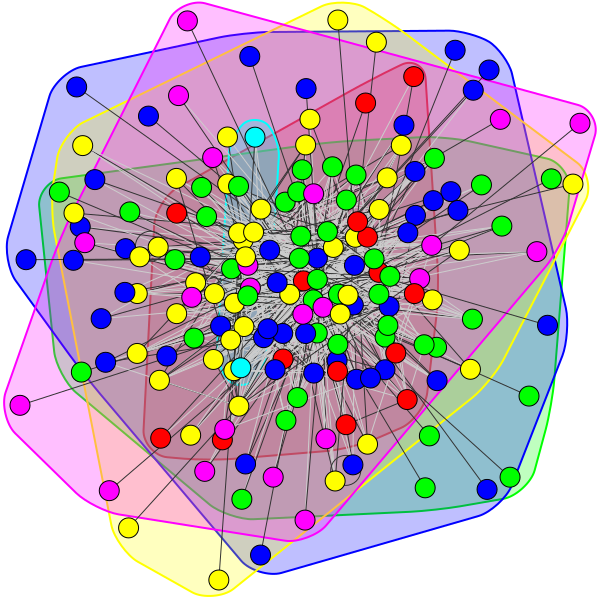

In [69]:
fg = g.community_fastgreedy(weights = 'weight')

comm_fastgreedy = fg.as_clustering()

ig.plot(comm_fastgreedy, mark_groups = True, layout="drl")

In [70]:
modularity = g.modularity(comm_fastgreedy, weights='weight')
print(modularity)

0.1628777314853962


In [71]:
df_fastgreedy = pd.DataFrame({'name': list(g.vs['name']), 'community':comm_fastgreedy.membership } )
df_fastgreedy

name  community
0                   Albania          0
1                   Bahamas          0
2                   Andorra          1
3    British Virgin Islands          2
4            Cayman Islands          3
..                      ...        ...
169               Venezuela          1
170                 Vietnam          3
171                   Yemen          1
172                  Zambia          2
173                Zimbabwe          2

[174 rows x 2 columns]

In [72]:
df_fastgreedy.describe()

community
count  174.000000
mean     2.126437
std      1.205043
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      5.000000

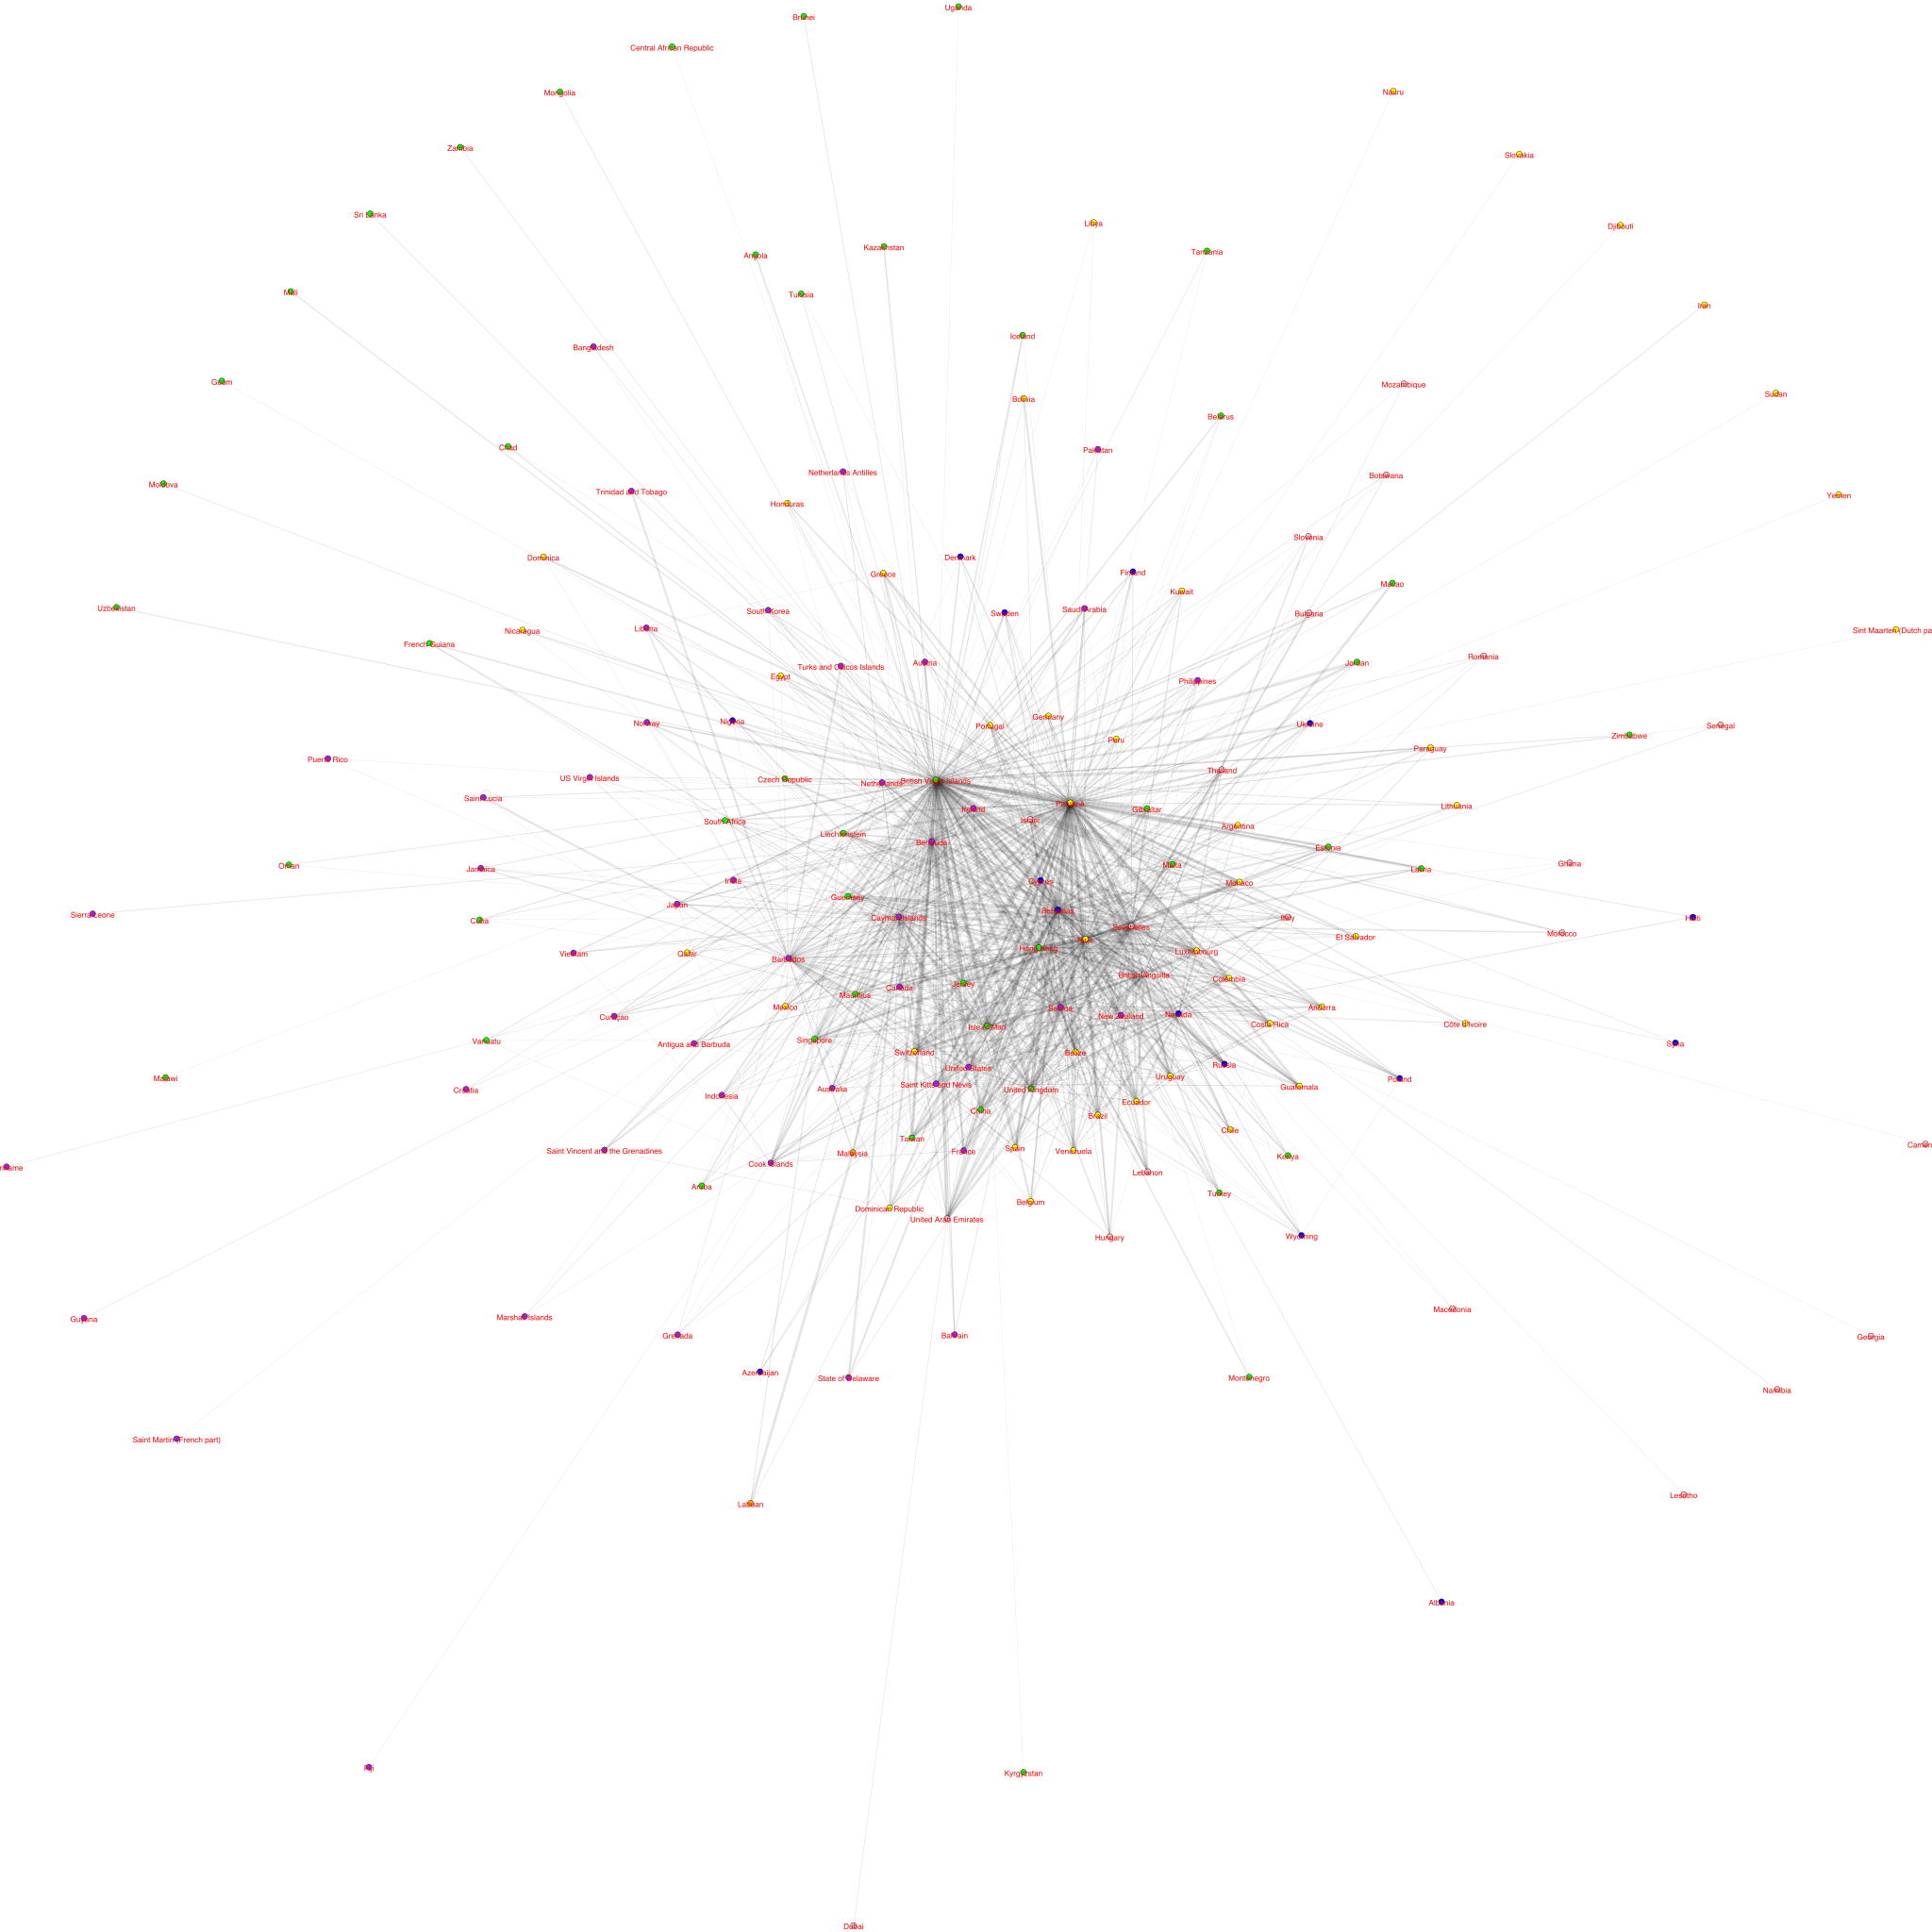

In [73]:
##plot community
visual_style = {}

vertex_colors = []

for i in range(len(comm_fastgreedy.membership)):
    vertex_colors.append(colors[comm_fastgreedy.membership[i]])
    
# Set bbox and margin
visual_style["bbox"] = (5000,5000)
visual_style["margin"] = 17

# Set vertex colours
visual_style["vertex_color"] = vertex_colors

# Set edge width
visual_style["edge_width"] = np.log(g.es['weight']) + 1

# Set edge color
visual_style["edge_color"] = "rgba(1,1,1,0.1)" 

# Set vertex size
visual_style["vertex_size"] = 15

# Set vertex label size
visual_style["vertex_label_size"] = 20

# Set vertex label color
visual_style["vertex_label_color"] = 'red'

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_images/communities_fastgreedy.png', vertex_label = g.vs['name'] , **visual_style)

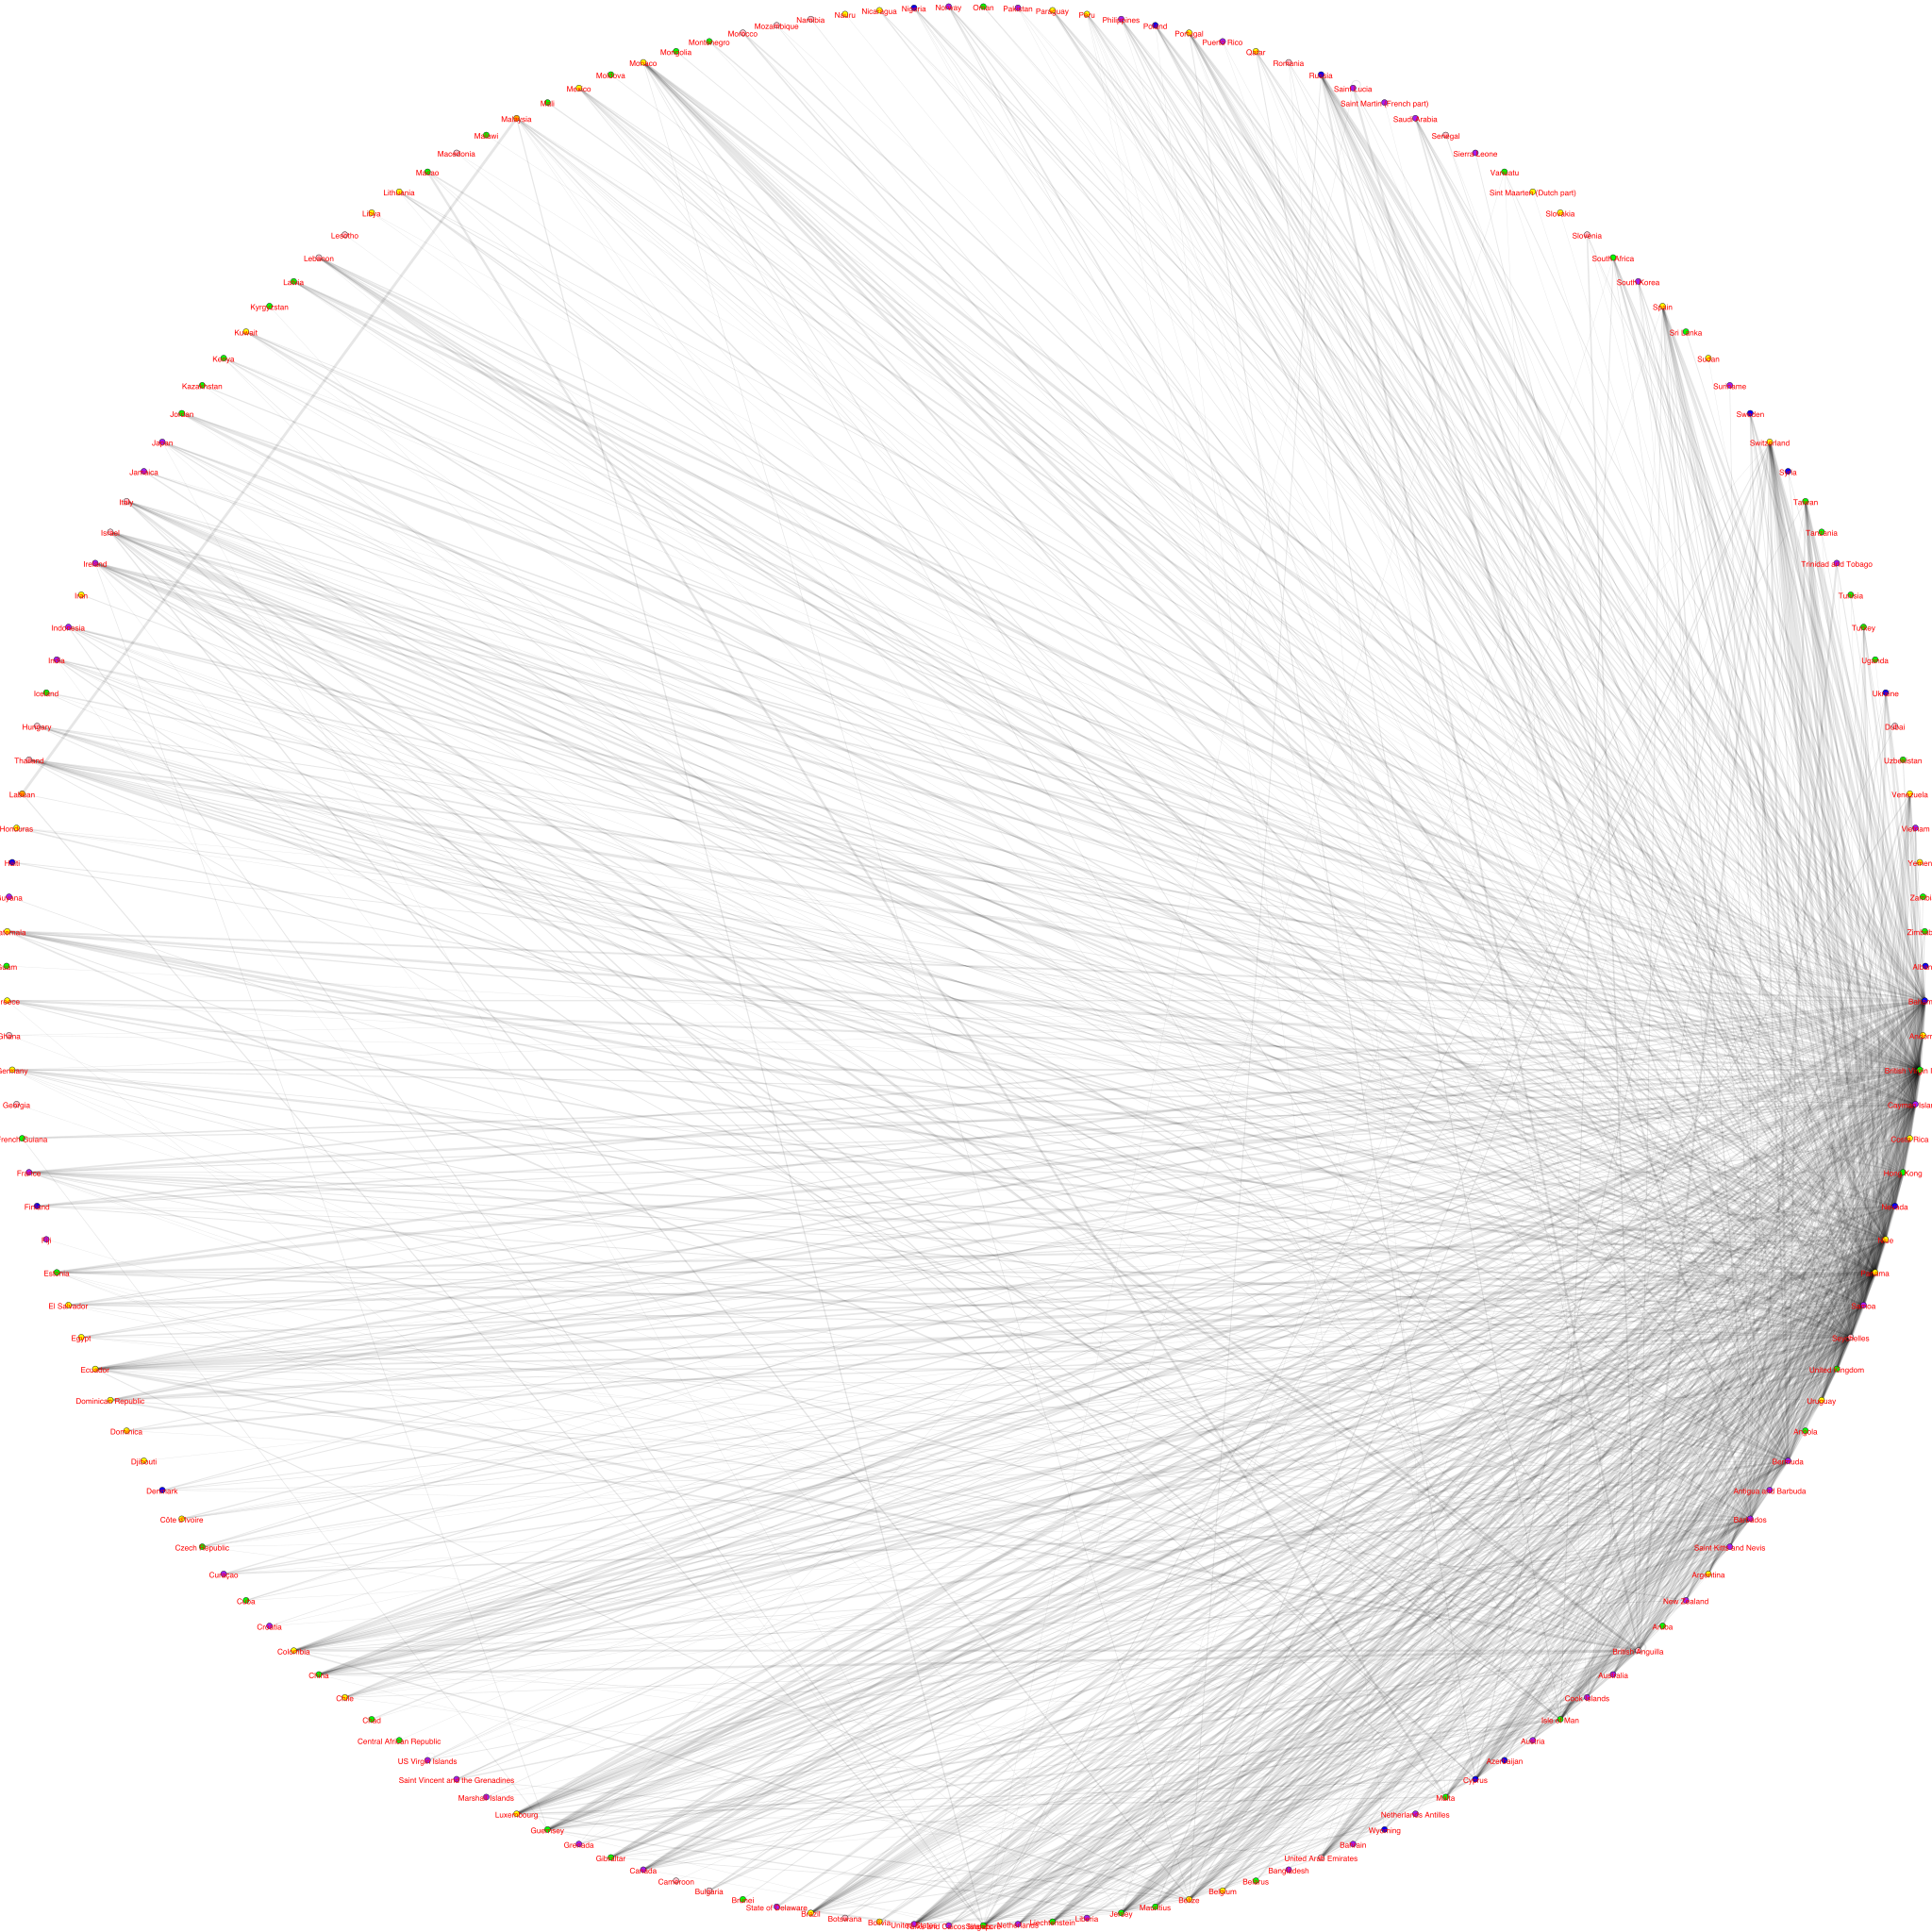

In [74]:
# Set the layout
my_layout = g.layout_circle()
visual_style["layout"] = my_layout

# Plot the graph
ig.plot(g,'jur_images/fastgreedy_circular.png', vertex_label = g.vs['name'] , **visual_style)

In [75]:
for i in range(len(comm_fastgreedy.subgraphs())):
    
    visual_style["bbox"] = (2000,2000)
    visual_style["margin"] = 17
    
    # Set vertex colours
    visual_style["vertex_color"] = 'green'

    # Set edge width
    visual_style["edge_width"] = np.log(comm_fastgreedy.subgraphs()[i].es['weight']) + 1
    # Set the layout
    my_layout = comm_fastgreedy.subgraphs()[i].layout_fruchterman_reingold()
    visual_style["layout"] = my_layout

    ig.plot(comm_fastgreedy.subgraphs()[i],'jur_images/fastgreedy_subgraph' + str(i) + '.png' ,vertex_label = comm_fastgreedy.subgraphs()[i].vs['name'],**visual_style  )
    

## Metrics

In [77]:
def get_avg_diameter(community):
    
    diameters = []
    
    for i in range(len(community.subgraphs())):
    
        diameters.append(community.subgraphs()[i].diameter())

    return np.mean(diameters)

In [78]:
def get_avg_transitivity(community):
    
    transitivity = []
    
    for i in range(len(community.subgraphs())):
    
        transitivity.append(community.subgraphs()[i].transitivity_undirected())

    return np.nanmean(transitivity)

In [79]:
get_avg_diameter(comm_fastgreedy)

2.1666666666666665

In [80]:
get_avg_transitivity(comm_fastgreedy)

0.25869265632050775

## Other Exploration

In [81]:
#g.cliques()

In [82]:
g.transitivity_undirected()

0.3859593515919117